# Исследование объявлений о продаже квартир

Исследуются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — определить основные особенности рынка недвижимости Санкт-Петербурга и Ленинградской области, основные параметры квартир и сформулировать возможные предложения для автоматизации оценки объявлений и выявления ошибок. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Загрузка данных и общая информация 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

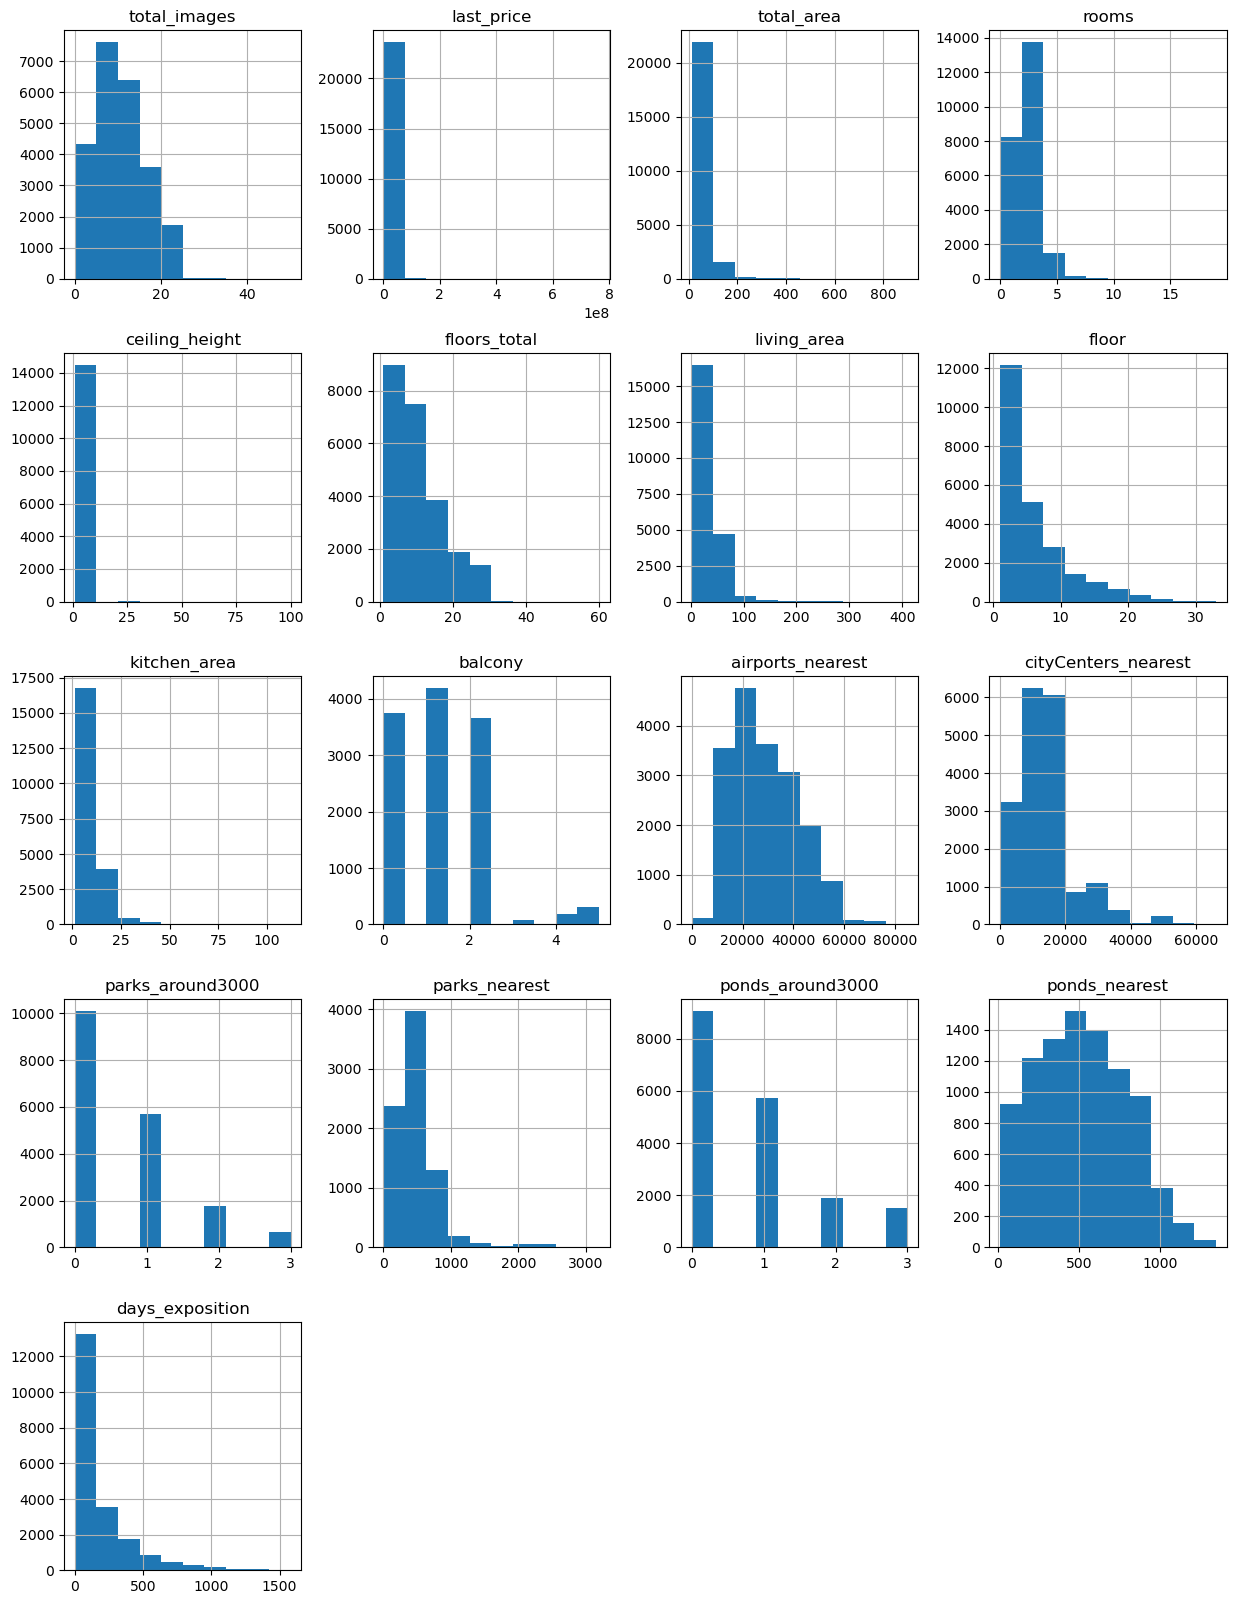

In [3]:
data.hist(figsize=(15, 20))

Уже на первый взгляд становится понятно, с какими пропусками в данных придется работать, какие данные заменить или перевести в правильный формат, а где заполнить данные средними значениями, либо нулями.
У всех объявлений есть основные параметры: количество фотографий, цена, площадь, дата выставления на продажу, количество комнат и этаж, на котором находится квартира. При исследовании, скорее всего, придется распрощаться с объявлениями, где не указан город в столбце locality_name, а некоторые другие значения заполнить недостающими данными.

### Предобработка данных

Начнем с общего понимания, где есть пропуски и продолжим по каждому из столбцов

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В первую очередь нужно очистить от пропусков основные установочные данные по квартирам.

Начнем со столбца is_apartment, который мало того, что имеет максимум пропусков, так еще и не имеет правильного типа столбца в соответствии с вводными.

In [5]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Скорее всего, отсутствие значения можно списать на человеческий фактор, где автор объявления решил, что раз его квартира не апартаменты - значит можно и не указывать, что это не апартаменты. Всё в рамках средней человеческой логики.

Тем более, апартаменты, с точки зрения закона, не могут считаться жилым помещением, и многие люди до сих пор этого не знают

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].unique()

array([False,  True])

Следующим столбцом возьмем balcony, изучим его и приведем к нормальному виду без пропусков.

In [7]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [8]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

Дробных значений у количества балконов быть не может (хотя, с другой стороны, это Питер, и возможно всякое).
Поэтому предположим, что человек мог, как и в случае со статусом апартаментов, решить, что раз балкона нет, то и ноль указывать необязательно. И, при прочих равных, не допустим наличия даже подозрения на частично существующие балконы.

Теперь перейдем к потолкам. Пропуски могут быть по причине незнания высоты своих потолков. При этом, есть стандартные значения для них - в хрущевках 2,5 м, в сталинках - 3,2 м, в панельках и большинстве новостроек - 2,7 м, хотя и могут быть исключения везде. Однако, ввиду того, что не указывается ни тип дома, ни год его постройки, предположим, что среди пропущенных значений будет только два варианта их заполнений - 2,5 для домов до 5 этажей и 2,7 для домов более 5 этажей.

In [9]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

"Это Питер, детка!" - здесь можно и 10-метровые потолки встретить. А 14-метровые - это уже Зимний дворец. 100-метровых потолков уж точно нет, если, конечно, не продается Исаакий. Поэтому предположим, что если значение высоты потолка больше 14 метров - будем делить его на 10.

In [10]:
for ceiling in data['ceiling_height']:
    if ceiling > 14:
        data.loc[(data['ceiling_height'] == ceiling), 'ceiling_height'] = ceiling/10
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [11]:
data.loc[(data['ceiling_height'].isna())&(data['floors_total']<=5.0), 'ceiling_height'] = 2.5
data.loc[(data['ceiling_height'].isna())&(data['floors_total']>5.0), 'ceiling_height'] = 2.7
data['ceiling_height'].unique()

array([ 2.7 ,  2.5 ,  3.03,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,   nan,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Все отсутствующие значения высоты потолков не заменились, значит установить их высоту не получается ввиду отсутствия информации по количеству этажей в здании. Таких записей всего 86 из 23699, поэтому в дальнейшем ими можно будет пренебречь.
Поэтому удалим эти строки.

In [12]:
data=data.dropna(subset=['floors_total'])
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Теперь у нас остались данные с пропусками по городу.
Также избавимся и от них, поскольку установить их принадлежность невозможно по иным косвенным признакам.

In [13]:
data=data.dropna(subset=['locality_name'])
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Но это еще не все.
Согласно тому, что пишут в Сети на тему стандартной высоты потолков (к примеру: https://dekoriko.ru/dizajn/kvartira/vysota-potolkov/) -- минимально допустимое для мансарды - 2,1 метра, поэтому посмотрим, сколько строк со значением ниже и если их немного - уберем.

In [14]:
display(data.loc[data['ceiling_height'] < 2.10])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,False,...,6.50,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,False,...,6.00,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,False,...,8.80,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,False,...,NaN,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,False,...,10.10,0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,False,...,12.00,0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,False,...,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
17496,15,6700000.0,92.90,2019-02-19T00:00:00,3,2.00,17.0,53.2,14,False,...,12.00,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN


Всего 15 значений - поэтому смело уберем эти записи.

In [15]:
data = data[data['ceiling_height'] >= 2.1]

Теперь приведем к нормальному виду переменные с плавающей точкой там, где должны быть целые значения: число этажей в доме, количество парков и прудов в радиусе 3км и прочее: сначала заполним пропуски, затем приведем к нормальному виду.

In [16]:
data['floors_total'] = data['floors_total'].astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23550 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23550 non-null  int64  
 1   last_price            23550 non-null  float64
 2   total_area            23550 non-null  float64
 3   first_day_exposition  23550 non-null  object 
 4   rooms                 23550 non-null  int64  
 5   ceiling_height        23550 non-null  float64
 6   floors_total          23550 non-null  int32  
 7   living_area           21687 non-null  float64
 8   floor                 23550 non-null  int64  
 9   is_apartment          23550 non-null  bool   
 10  studio                23550 non-null  bool   
 11  open_plan             23550 non-null  bool   
 12  kitchen_area          21330 non-null  float64
 13  balcony               23550 non-null  int32  
 14  locality_name         23550 non-null  object 
 15  airports_nearest   

В нашем исследовании понадобится изучить различные зависимости рынка недвижимости от параметров квартиры.
Поскольку у нас есть пропуски в значениях жилой площади и площади кухни, но нет пропусков в значениях общей площади, мы можем попробовать заполнить пропуски средними значениями, найдя для ненулевых значений жилых площадей их отношение к их общей площади, проделав то же самое для кухни. При этом будем соблюдать правило, что сумма площади кухни и жилой площади должна быть меньше общей площади квартиры.

Для начала найдем соотношение средней общей площади к средней жилой площади.

In [17]:
data['total_area'].mean()/data['living_area'].mean()

1.7508305237888302

И аналогичный показатель для площади кухни.

In [18]:
data['total_area'].mean()/data['kitchen_area'].mean()

5.711882923870581

Таким образом, можно рассчитать пропущенные значения, разделив общую площадь на 1.74 для жилой площади и на 5,71 для площади кухни. После заполнения пропусков проверим условие о непревышении суммой площадей общей площади и уже в случае превышения уберем выбивающиеся значения.

Заполним пропуски по жилой площади медианным значением для квартир с аналогичным количеством комнат. Затем то же самое проделаем с кухнями и проверим условие.

In [19]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform("median"))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform("median"))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23550 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23550 non-null  int64  
 1   last_price            23550 non-null  float64
 2   total_area            23550 non-null  float64
 3   first_day_exposition  23550 non-null  object 
 4   rooms                 23550 non-null  int64  
 5   ceiling_height        23550 non-null  float64
 6   floors_total          23550 non-null  int32  
 7   living_area           23550 non-null  float64
 8   floor                 23550 non-null  int64  
 9   is_apartment          23550 non-null  bool   
 10  studio                23550 non-null  bool   
 11  open_plan             23550 non-null  bool   
 12  kitchen_area          23356 non-null  float64
 13  balcony               23550 non-null  int32  
 14  locality_name         23550 non-null  object 
 15  airports_nearest   

In [20]:
data = data.query('living_area + kitchen_area < total_area')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22993 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22993 non-null  int64  
 1   last_price            22993 non-null  float64
 2   total_area            22993 non-null  float64
 3   first_day_exposition  22993 non-null  object 
 4   rooms                 22993 non-null  int64  
 5   ceiling_height        22993 non-null  float64
 6   floors_total          22993 non-null  int32  
 7   living_area           22993 non-null  float64
 8   floor                 22993 non-null  int64  
 9   is_apartment          22993 non-null  bool   
 10  studio                22993 non-null  bool   
 11  open_plan             22993 non-null  bool   
 12  kitchen_area          22993 non-null  float64
 13  balcony               22993 non-null  int32  
 14  locality_name         22993 non-null  object 
 15  airports_nearest   

Итого из данных были исключены около 600 записей. При этом не факт, что все эти записи были заполненными пропусками, могли также попасть полные записи, где были допущены ошибки в заполнении.

Теперь пришло время поработать с географическими названиями, изучить их и привести в порядок.

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Самое сложное, что есть в этом датафрейме - это перевод дублирующихся одинаковых названий с незначительной разницей к единому виду.

In [22]:
data['locality_name'] = data['locality_name'].replace('посёлок|деревня|село|городской|пок|городского типа|коттеджный|садоводческое некоммерческое товарищество|садовое товарищество|при железнодорожной станции|станции|поселок', '', regex=True).str.strip()
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Александ

Теперь, похоже, все наименования населенных пунктов - имена собственные. Пока этим ограничимся.

Следующий этап - приведение значений даты выставления объявления в корректный вид.

In [23]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22993 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22993 non-null  int64         
 1   last_price            22993 non-null  float64       
 2   total_area            22993 non-null  float64       
 3   first_day_exposition  22993 non-null  datetime64[ns]
 4   rooms                 22993 non-null  int64         
 5   ceiling_height        22993 non-null  float64       
 6   floors_total          22993 non-null  int32         
 7   living_area           22993 non-null  float64       
 8   floor                 22993 non-null  int64         
 9   is_apartment          22993 non-null  bool          
 10  studio                22993 non-null  bool          
 11  open_plan             22993 non-null  bool          
 12  kitchen_area          22993 non-null  float64       
 13  balcony         

Заполнить пропуски в значениях "времени жизни" объявления невозможно, скорее всего здесь ошибка в сборе информации в датафрейм, либо объявления могли быть размещены и не пройти модерацию, либо они могут находиться в активном статусе даже на момент сбора данных.
Также невозможно заполнить данные в удаленности от центра города, либо от ближайшего парка, не имея конкретного адреса квартиры.
Аналогичная ситуация с аэропортами. В Ленинградской области есть много аэродромов и аэропортов: https://airportsinfo.ru/region/aeroporty-leningradskaya-oblast, и подсчитать корректный показатель даже в среднем невозможно. С другой стороны, можно было бы предположить эталонным аэропортом Пулково, но в таком случае также возможны ошибки и неточности.
В связи с этим, дальнейшие пропуски заполнять весьма и весьма проблематично, поэтому оставим данные как есть.

Последний штрих - приведем наименования столбцов к единообразию.

In [24]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest','parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'}, inplace=True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Теперь переходим к исследованию данных и выполнению основного задания.

### Дополнение данных

Дополним таблицу новыми столбцами, которые помогут в дальнейшем исследовании.

In [25]:
def categorize_floor(row):
    floor = row['floor']
    total_floors = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(categorize_floor, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,другой
1,7,3350000.0,40.40,2018-12-04,1,2.70,11,18.60,1,False,...,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,первый
2,10,5196000.0,56.00,2015-08-20,2,2.50,5,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,другой
3,0,64900000.0,159.00,2015-07-24,3,2.70,14,45.00,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,другой
5,10,2890000.0,30.40,2018-09-10,1,2.70,12,14.40,5,False,...,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,другой
6,6,3700000.0,37.30,2017-11-02,1,2.70,26,10.60,6,False,...,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,другой
7,5,7915000.0,71.60,2019-04-18,2,2.70,24,30.50,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,другой
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,другой


Теперь добавим столбец с ценой одного квадратного метра

In [26]:
data['meter_price'] = data['last_price']/data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,floor_category,meter_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,другой,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.70,11,18.60,1,False,...,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,первый,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.50,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,другой,92785.714286
3,0,64900000.0,159.00,2015-07-24,3,2.70,14,45.00,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,другой,408176.100629
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,другой,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,2.70,12,14.40,5,False,...,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,другой,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.70,26,10.60,6,False,...,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,другой,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,2.70,24,30.50,22,False,...,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,другой,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,другой,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,другой,88524.590164


Поменяем данные по расстояниям до центра города, до ближайшего аэропорта, переведя значения в километры и округлив до 2 знаков после запятой.

In [27]:
data['city_centers_nearest'] = (data['city_centers_nearest']/1000).round(2)
data['airports_nearest'] = (data['airports_nearest']/1000).round(2)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,floor_category,meter_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18.86,16.03,1,482.0,2,755.0,NaN,другой,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.70,11,18.60,1,False,...,Шушары,12.82,18.60,0,NaN,0,NaN,81.0,первый,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.50,5,34.30,4,False,...,Санкт-Петербург,21.74,13.93,1,90.0,2,574.0,558.0,другой,92785.714286
3,0,64900000.0,159.00,2015-07-24,3,2.70,14,45.00,9,False,...,Санкт-Петербург,28.10,6.80,2,84.0,3,234.0,424.0,другой,408176.100629
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,Санкт-Петербург,31.86,8.10,2,112.0,1,48.0,121.0,другой,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,2.70,12,14.40,5,False,...,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,другой,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.70,26,10.60,6,False,...,Парголово,53.00,19.14,0,NaN,0,NaN,155.0,другой,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,2.70,24,30.50,22,False,...,Санкт-Петербург,23.98,11.63,0,NaN,0,NaN,NaN,другой,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,другой,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,50.90,15.01,0,NaN,0,NaN,289.0,другой,88524.590164


Добавим отдельными столбцами год, месяц и день недели размещения объявления.

In [28]:
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,floor_category,meter_price,year,month,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,другой,120370.370370,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,0,NaN,0,NaN,81.0,первый,82920.792079,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,1,90.0,2,574.0,558.0,другой,92785.714286,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.0,9,False,...,2,84.0,3,234.0,424.0,другой,408176.100629,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,другой,100000.000000,2018,6,1


Однако тяжело запомнить, что 0 - это понедельник, 1 - вторник и так далее, поэтому превратим индексы в нормальные дни недели.

In [29]:
def weekday_convert(day):
    if day == 0:
        return 'понедельник'
    elif day == 1:
        return 'вторник'
    elif day == 2:
        return 'среда'
    elif day == 3:
        return 'четверг'
    elif day == 4:
        return 'пятница'
    elif day == 5:
        return 'суббота'
    elif day == 6:
        return 'воскресенье'
data['day_name'] = data['weekday'].apply(weekday_convert)
data.drop(columns=['weekday'], axis=1,inplace=True)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,floor_category,meter_price,year,month,day_name
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,другой,120370.370370,2019,3,четверг
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,0,NaN,0,NaN,81.0,первый,82920.792079,2018,12,вторник
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,1,90.0,2,574.0,558.0,другой,92785.714286,2015,8,четверг
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.0,9,False,...,2,84.0,3,234.0,424.0,другой,408176.100629,2015,7,пятница
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,другой,100000.000000,2018,6,вторник


Теперь можно приступать к анализу данных.

## Исследовательский анализ данных

Изучим общие данные по рынку, построив графики по данным о цене квартир, о количестве комнат, этажах и прочее.

### Основные параметры квартир

Изучим данные по площади представленных квартир.

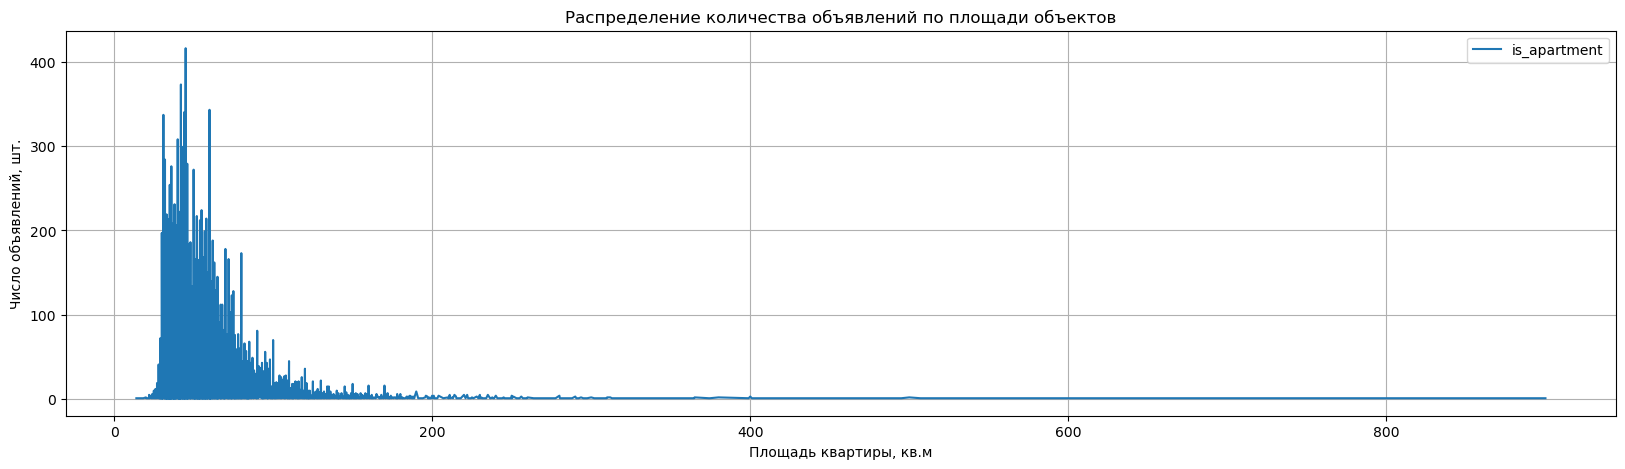

In [30]:
data.pivot_table(index='total_area',values='is_apartment',aggfunc='count').plot(grid=True, figsize=(20, 5))
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Площадь квартиры, кв.м')
plt.title('Распределение количества объявлений по площади объектов')
plt.show()

Сразу видно, что есть некоторые объявления, в которых площадь объекта чересчур велика.

Поэтому изучим распределение объявлений для квартир площадью меньше 300 метров.

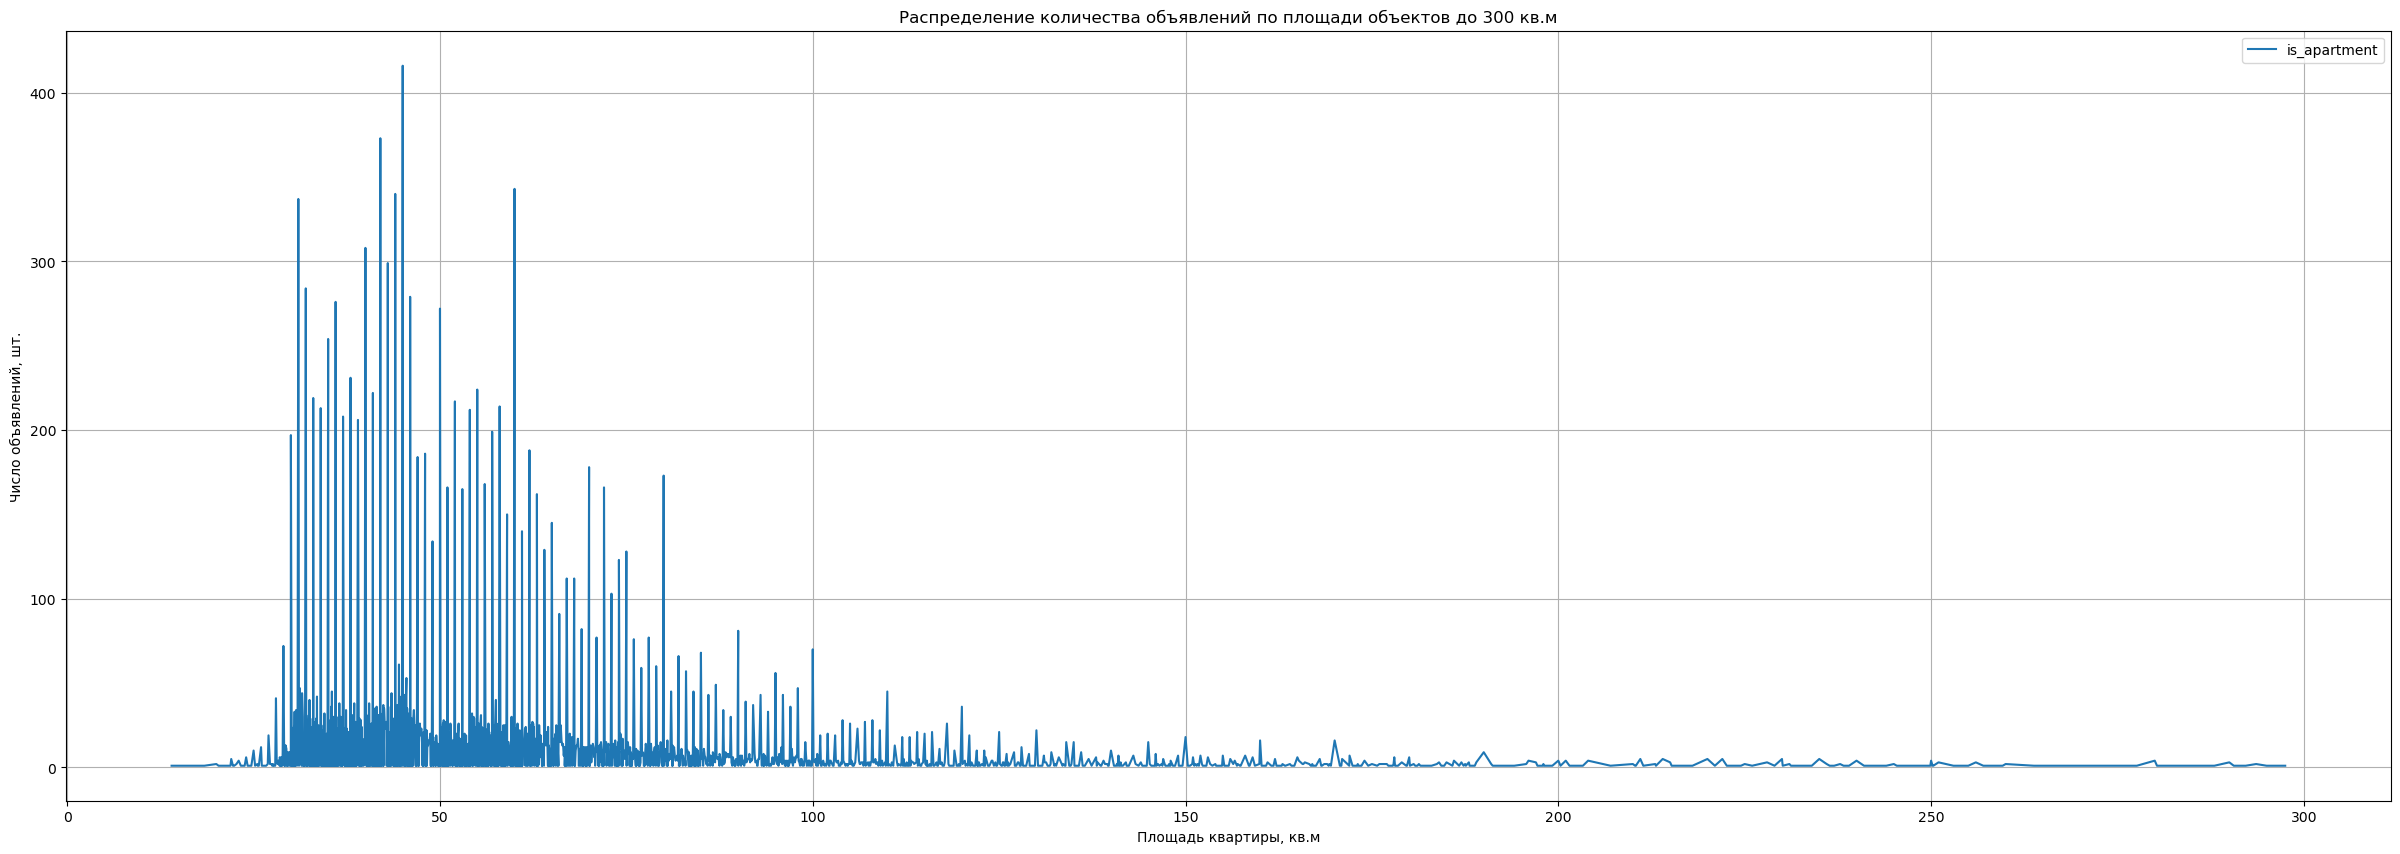

In [32]:
data.query('total_area < 300').pivot_table(index='total_area',values='is_apartment',aggfunc='count').plot(grid=True, figsize=(30, 10))
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Площадь квартиры, кв.м')
plt.title('Распределение количества объявлений по площади объектов до 300 кв.м')
plt.show()

Достаточно наглядно видно, что наибольшее число квартир имеет площадь от 30 до 80 метров.
Теперь изучим распределение квартир по количеству комнат

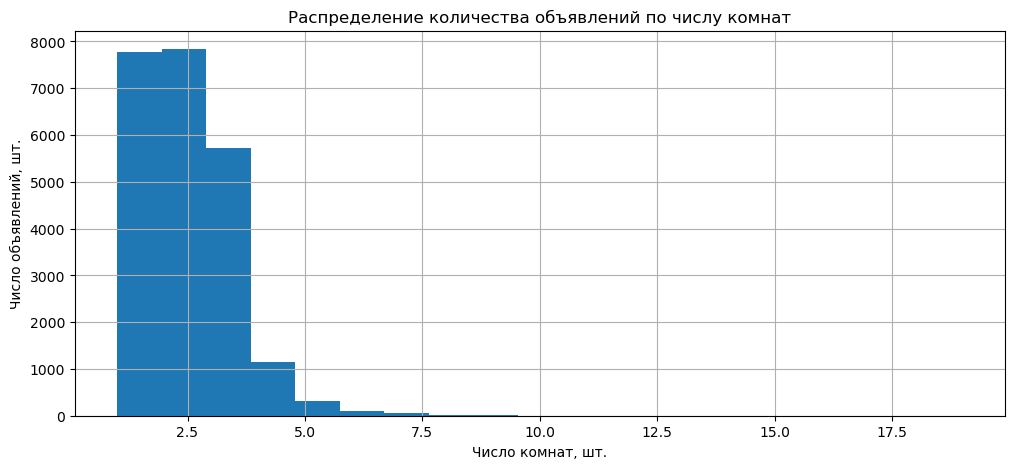

In [34]:
data.hist(column='rooms',bins=(data['rooms'].max()),figsize=(12,5))
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Число комнат, шт.')
plt.title('Распределение количества объявлений по числу комнат')
plt.show()

Примерно одинаковое количество одно- и двухкомнатных квартир выставлены на продажу. Следом идут трехкомнатные, и далее с большим отрывом идут многокомнатные квартиры.

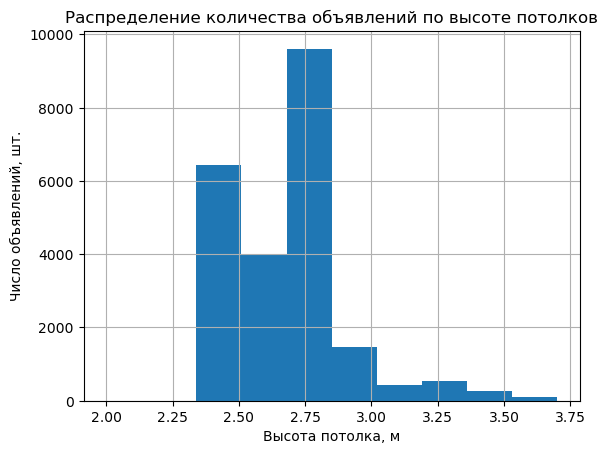

In [35]:
data['ceiling_height'].hist(bins=10,range=(2.0,3.7),grid=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Высота потолка, м')
plt.title('Распределение количества объявлений по высоте потолков')
plt.show()

Из гистограммы распределения высоты потолков следует, что большинство квартир в продаже имеют "стандартную" высоту потолка: от 2,5 до 2,7 метров (что обусловлено максимальным распространением хрущевок и более новых панельных и монолитных домов массового сектора). Также есть некоторое количество сталинок с легендарными трехметровыми потолками. Остальные значения малы, и, скорее всего, относятся к старому фонду Петербурга и пригородов.

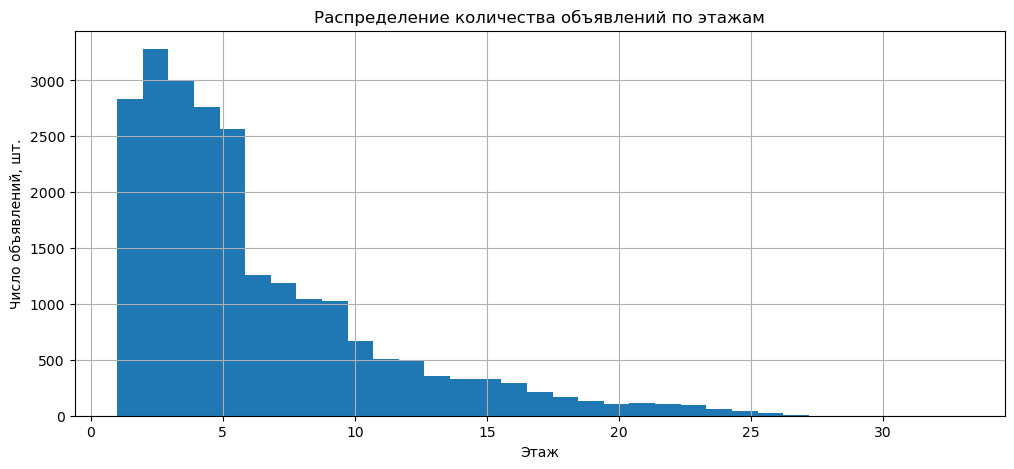

In [37]:
data.hist(column='floor',bins=(data['floor'].max()),grid=True,figsize=(12,5))
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Этаж')
plt.title('Распределение количества объявлений по этажам')
plt.show()

Достаточно много квартир продается на первых пяти этажах домов, что, скорее всего, обусловлено большим количеством малоэтажных домов в С-Пб., а также, возможно, тем, что на первых 10 этажах квартиры максимально ходовые на рынке.

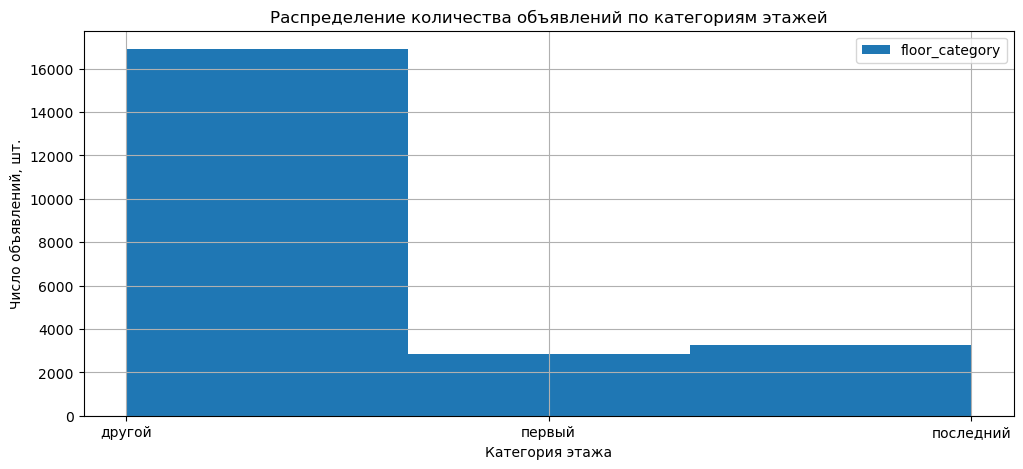

In [39]:
data['floor_category'].hist(bins=3,grid=True,figsize=(12,5),legend=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Категория этажа')
plt.title('Распределение количества объявлений по категориям этажей')
plt.show()

Эта гистограмма дополнительно иллюстрирует предыдущий вывод. Первых и последних этажей значительно меньше, чем всех остальных. И это логично, поскольку между первым и последним этажом намного больше разных вариантов.

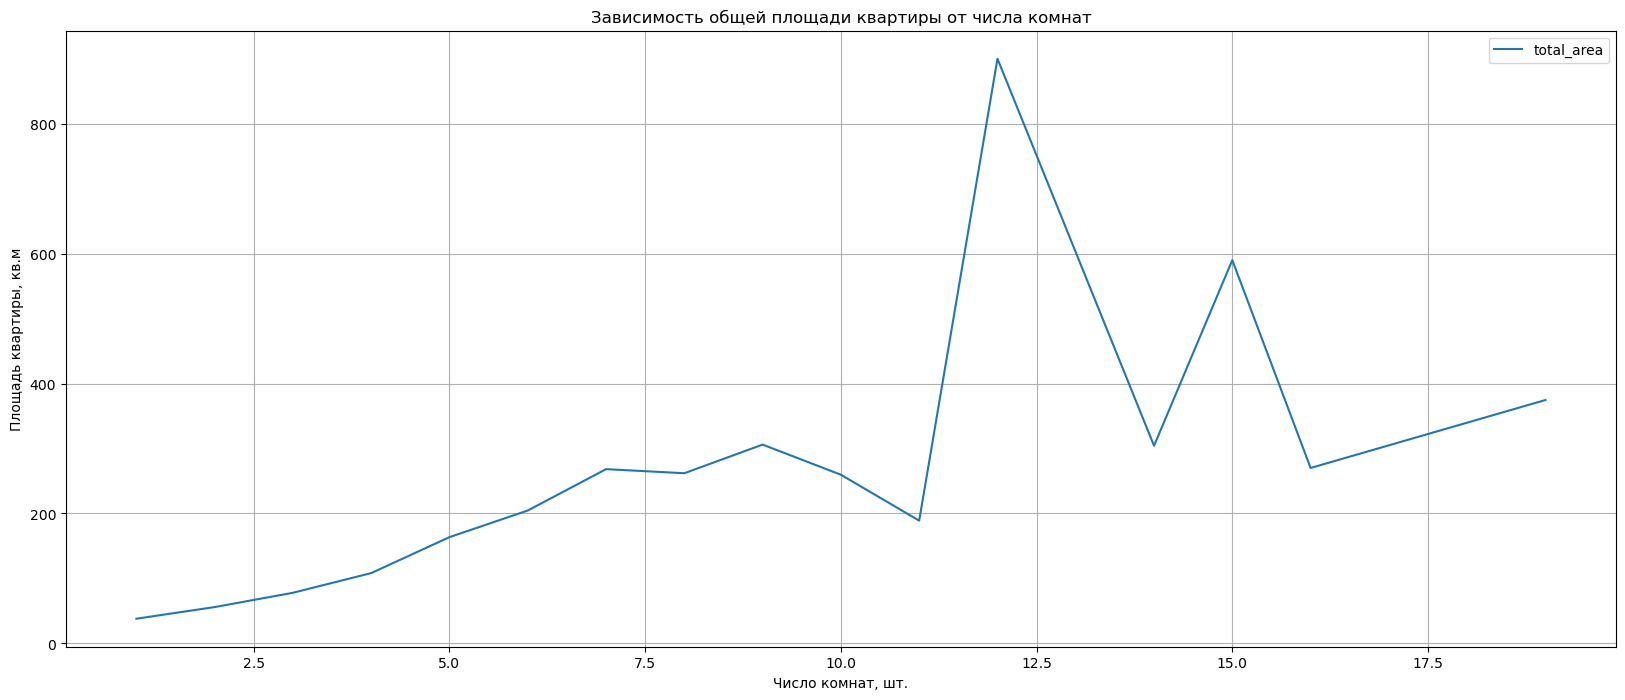

In [43]:
data.pivot_table(index='rooms', values='total_area').plot(grid=True,figsize=(20,8))
plt.ylabel('Площадь квартиры, кв.м')
plt.xlabel('Число комнат, шт.')
plt.title('Зависимость общей площади квартиры от числа комнат')
plt.show()

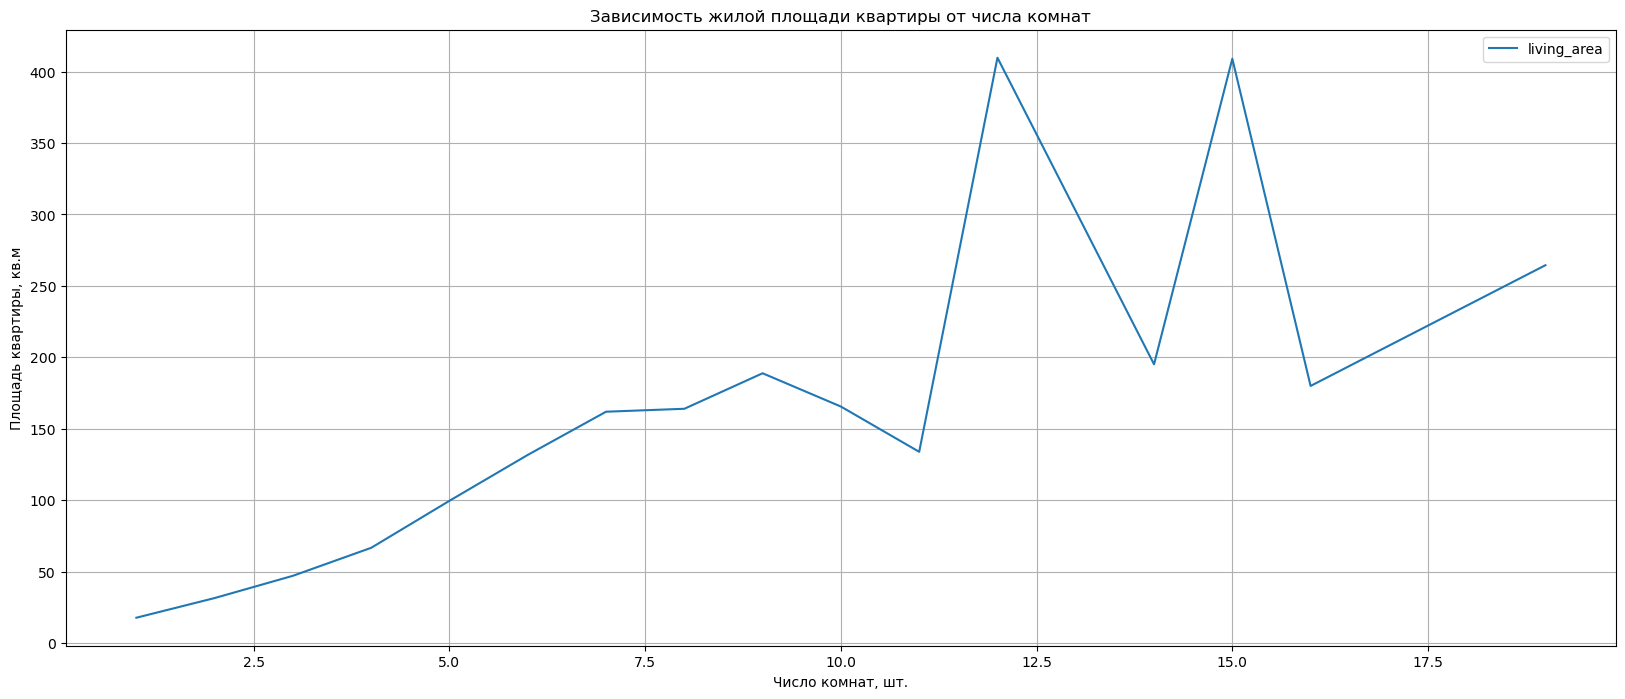

In [44]:
data.pivot_table(index='rooms', values='living_area').plot(grid=True,figsize=(20,8))
plt.ylabel('Площадь квартиры, кв.м')
plt.xlabel('Число комнат, шт.')
plt.title('Зависимость жилой площади квартиры от числа комнат')
plt.show()

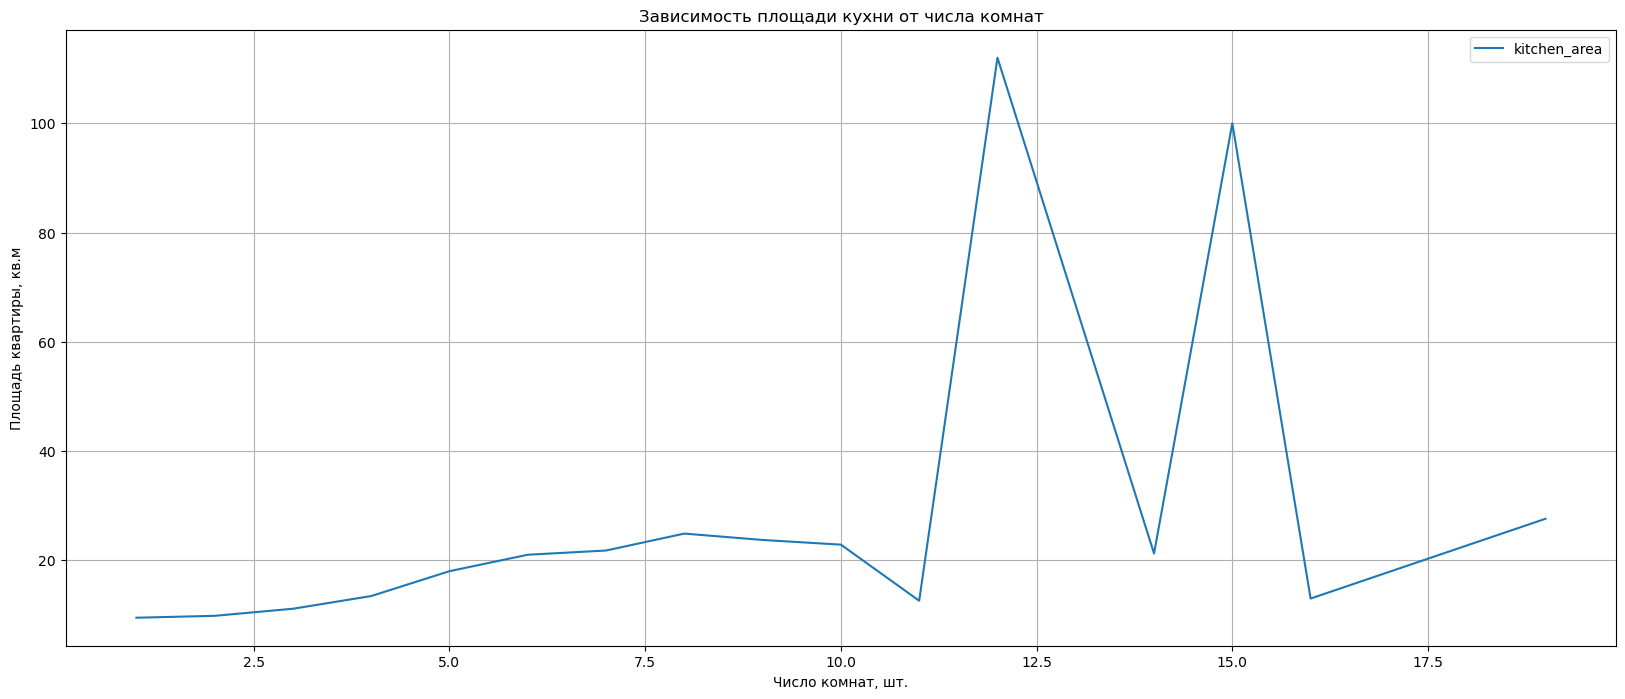

In [45]:
data.pivot_table(index='rooms', values='kitchen_area').plot(grid=True,figsize=(20,8))
plt.ylabel('Площадь квартиры, кв.м')
plt.xlabel('Число комнат, шт.')
plt.title('Зависимость площади кухни от числа комнат')
plt.show()

Весьма интересно то, что графики общей площади, жилой площади и площади кухни ведут себя практически одинаково для квартир, в которых более 8 комнат. Из этого можно сделать вывод, что данные для этих квартир "грязные", либо внесены с ошибками, поскольку противоречат простейшей логике. Поэтому избавимся от них и изучим заново все предыдущие показатели.

In [46]:
data = data[data['rooms'] <= 8]

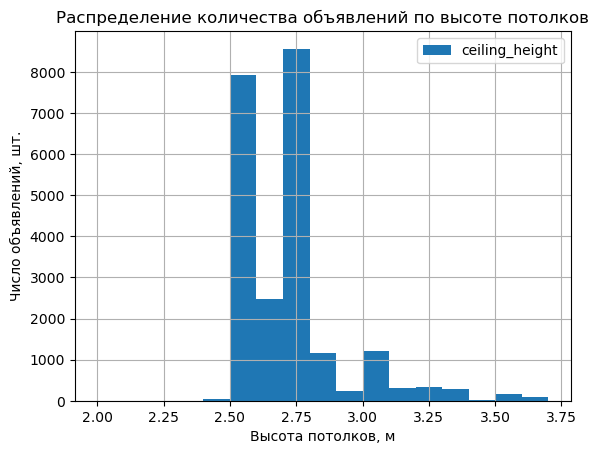

In [48]:
data['ceiling_height'].hist(bins=17,range=(2.0,3.7),grid=True,legend=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Высота потолков, м')
plt.title('Распределение количества объявлений по высоте потолков')
plt.show()

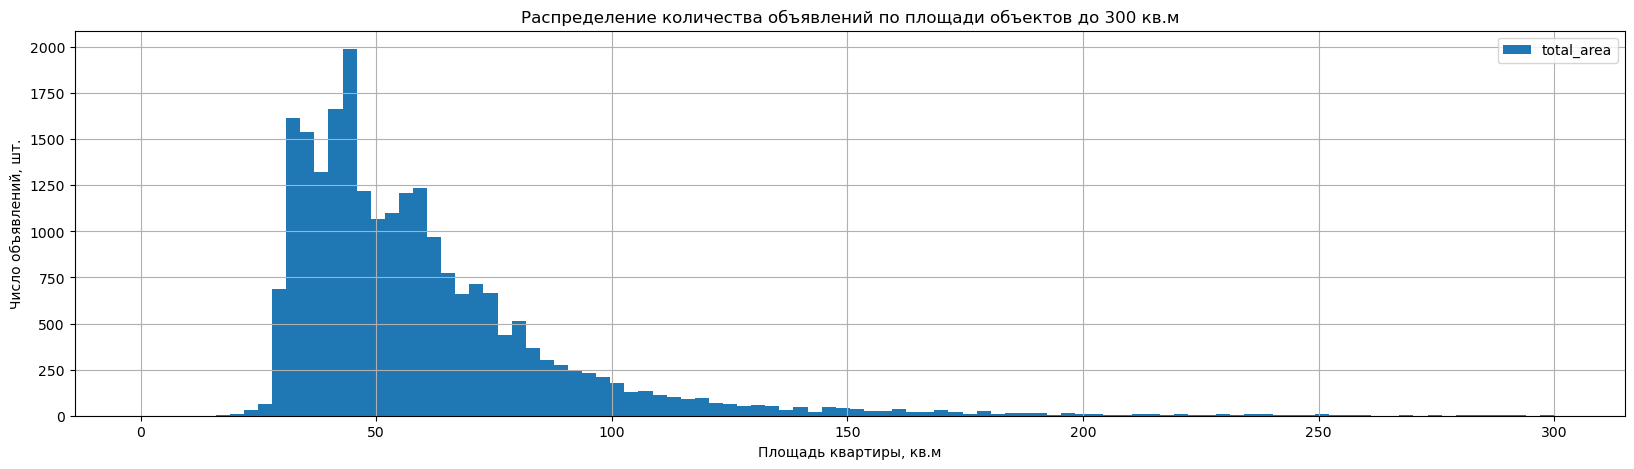

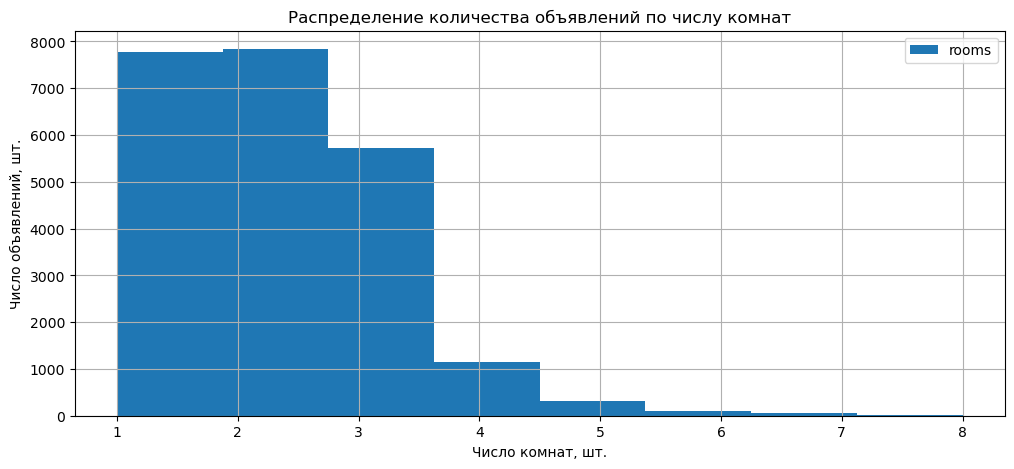

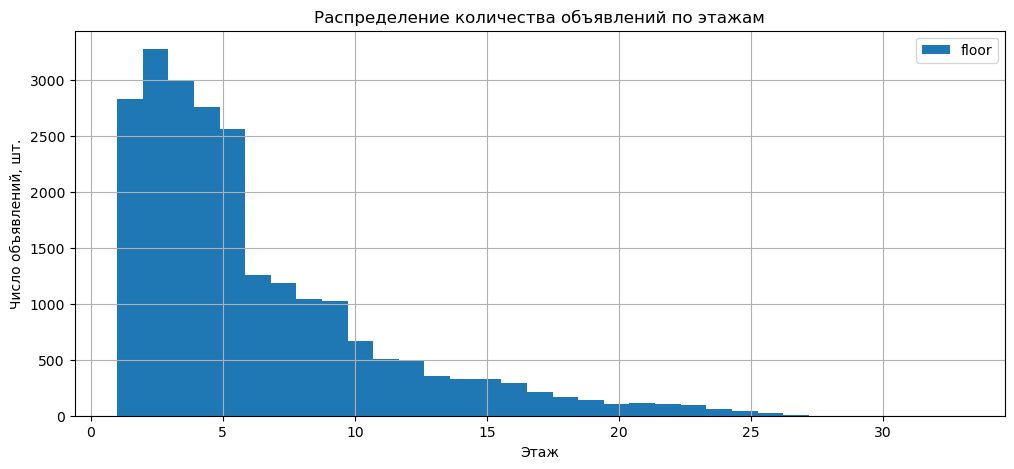

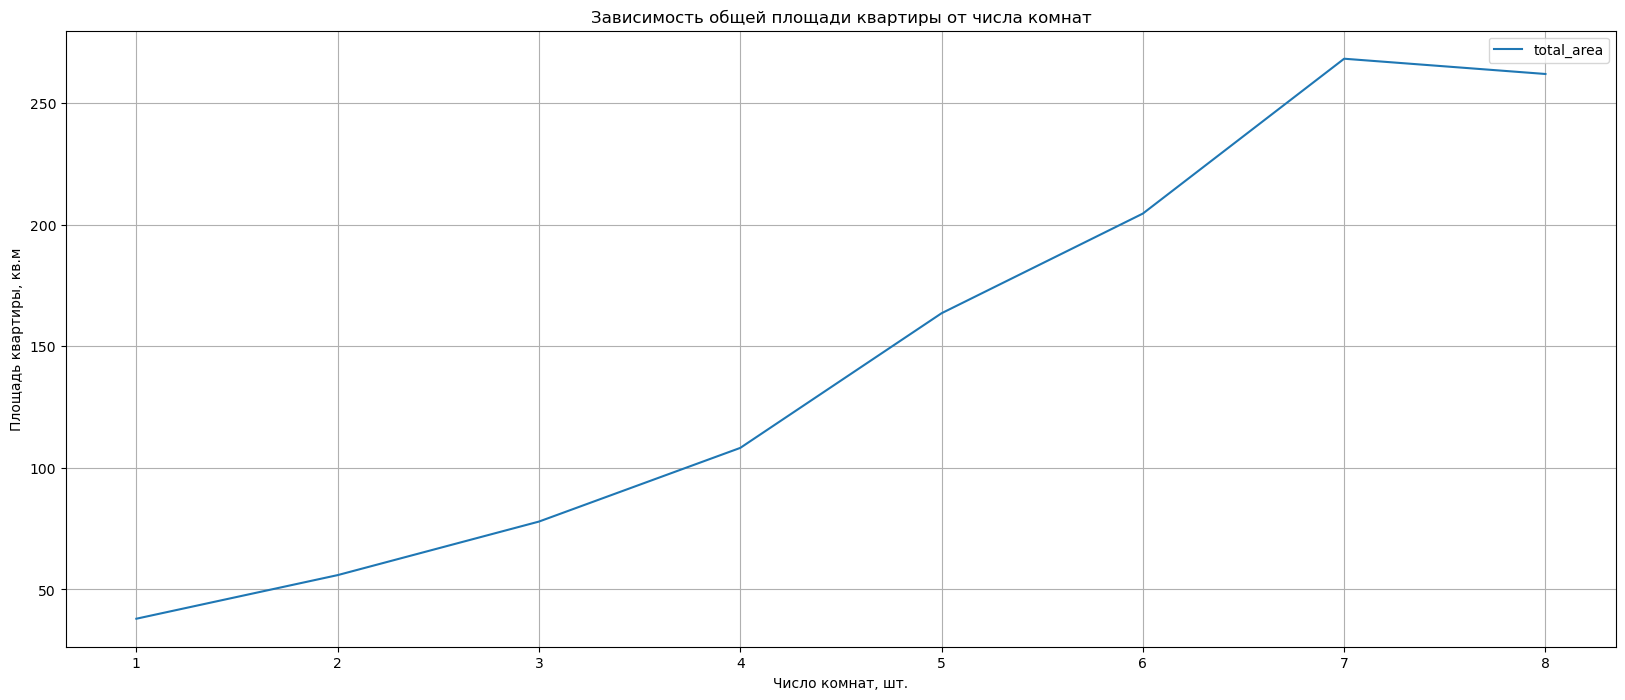

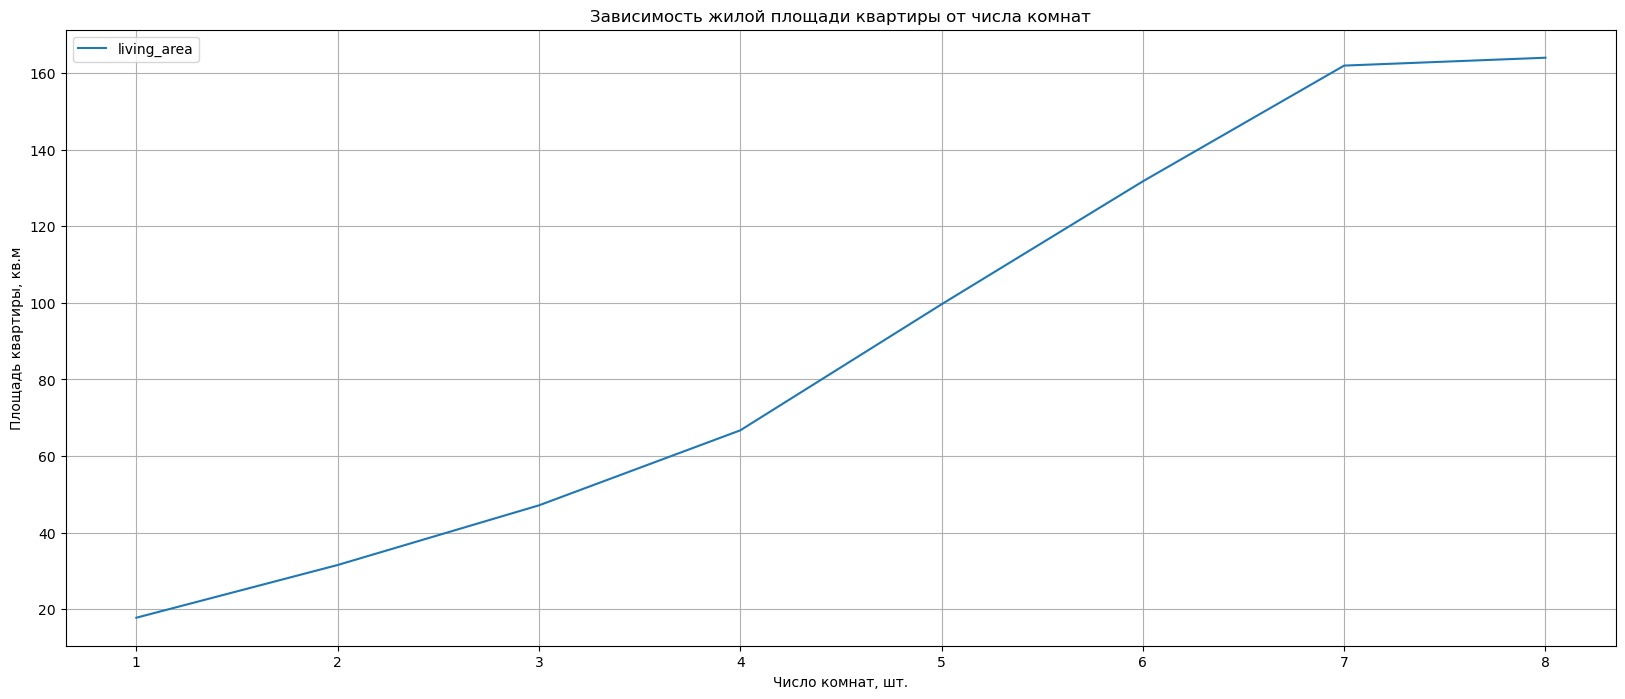

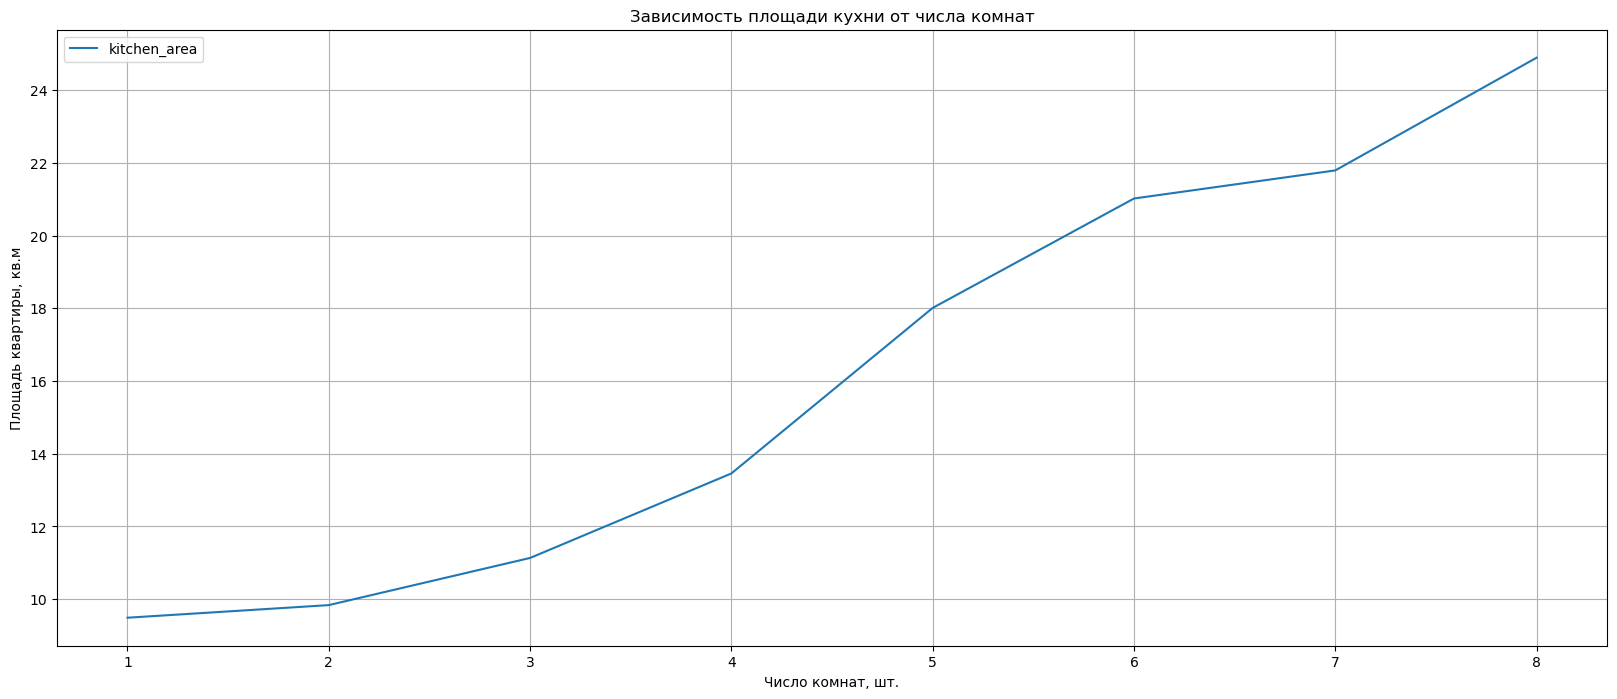

In [51]:
data['total_area'].hist(range=(1,300),bins=100,grid=True, figsize=(20, 5),legend=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Площадь квартиры, кв.м')
plt.title('Распределение количества объявлений по площади объектов до 300 кв.м')
data.hist(column='rooms',bins=(data['rooms'].max()),figsize=(12,5),legend=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Число комнат, шт.')
plt.title('Распределение количества объявлений по числу комнат')
data.hist(column='floor',bins=(data['floor'].max()),grid=True,figsize=(12,5),legend=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Этаж')
plt.title('Распределение количества объявлений по этажам')
data.pivot_table(index='rooms', values='total_area').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Площадь квартиры, кв.м')
plt.xlabel('Число комнат, шт.')
plt.title('Зависимость общей площади квартиры от числа комнат')
data.pivot_table(index='rooms', values='living_area').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Площадь квартиры, кв.м')
plt.xlabel('Число комнат, шт.')
plt.title('Зависимость жилой площади квартиры от числа комнат')
data.pivot_table(index='rooms', values='kitchen_area').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Площадь квартиры, кв.м')
plt.xlabel('Число комнат, шт.')
plt.title('Зависимость площади кухни от числа комнат')
plt.show()

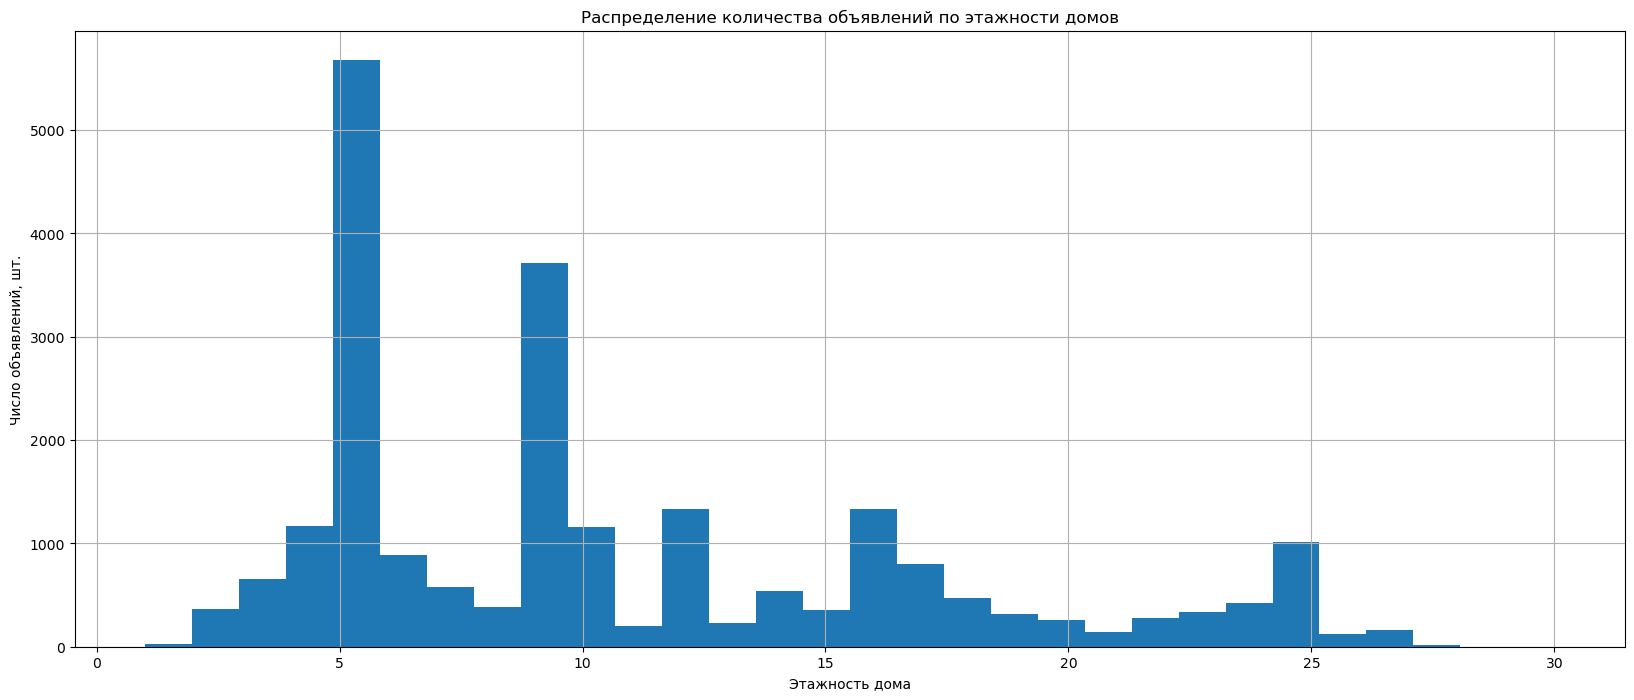

In [54]:
data['floors_total'].hist(range=(1,30),bins=30,grid=True,figsize=(20,8))
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Этажность дома')
plt.title('Распределение количества объявлений по этажности домов')
plt.show()

Теперь данные имеют более реалистичный вид, и, скорее всего, очищены от некачественных записей, которые могли оказывать влияние на дальнейшие расчеты и исследование.

Изучим удаленность объектов от центра города, от ближайшего аэропорта и от ближайшего парка.

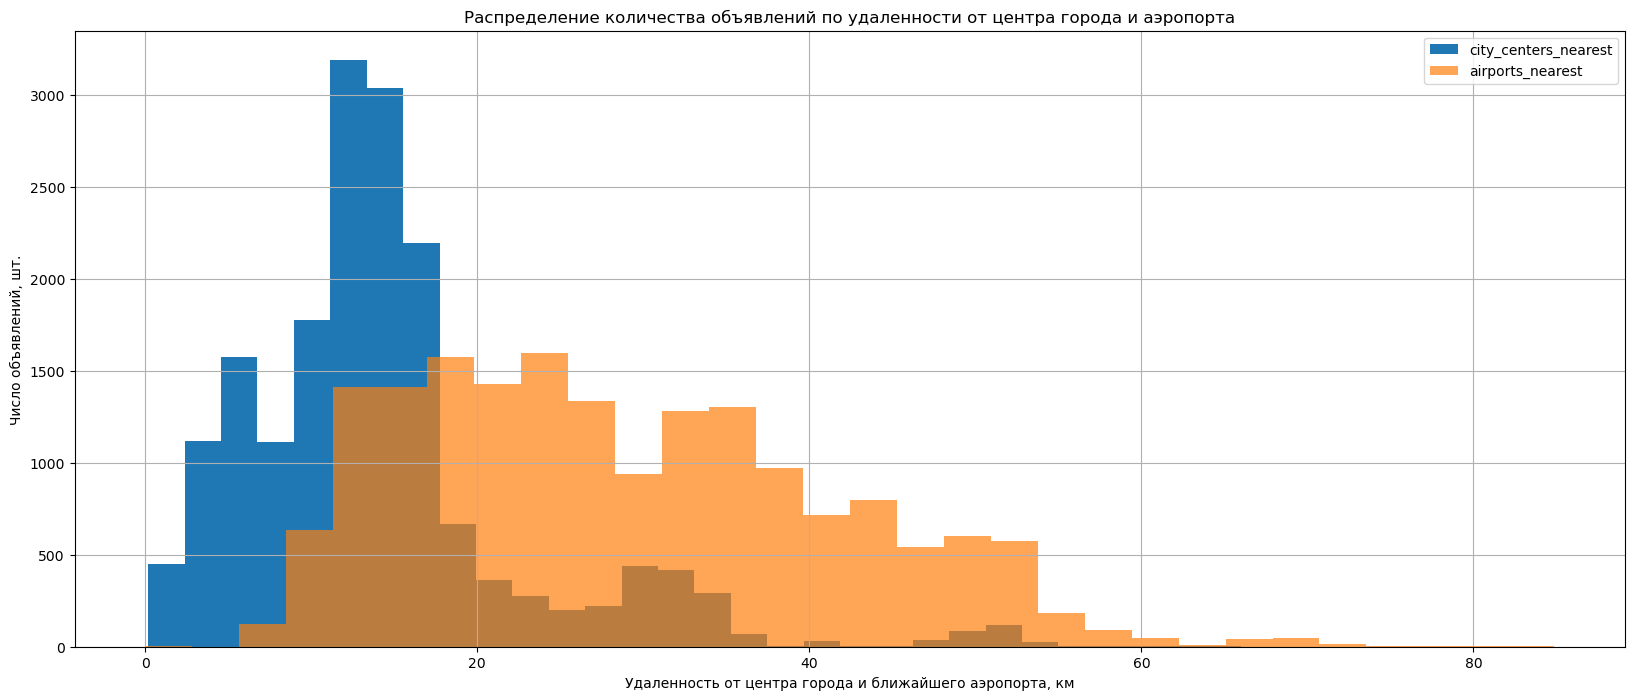

In [63]:
data['city_centers_nearest'].hist(bins=30,grid=True,figsize=(20,8),legend=True)
data['airports_nearest'].hist(bins=30,grid=True,figsize=(20,8),legend=True,alpha=0.7)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Удаленность от центра города и ближайшего аэропорта, км')
plt.title('Распределение количества объявлений по удаленности от центра города и аэропорта')
plt.show()

Итого выходит, что достаточно много квартир находится в радиусе 10-15 километров от центра города. При этом можно разбить всю выборку на две группы: Санкт-Петербург и вся остальная Ленинградская область.

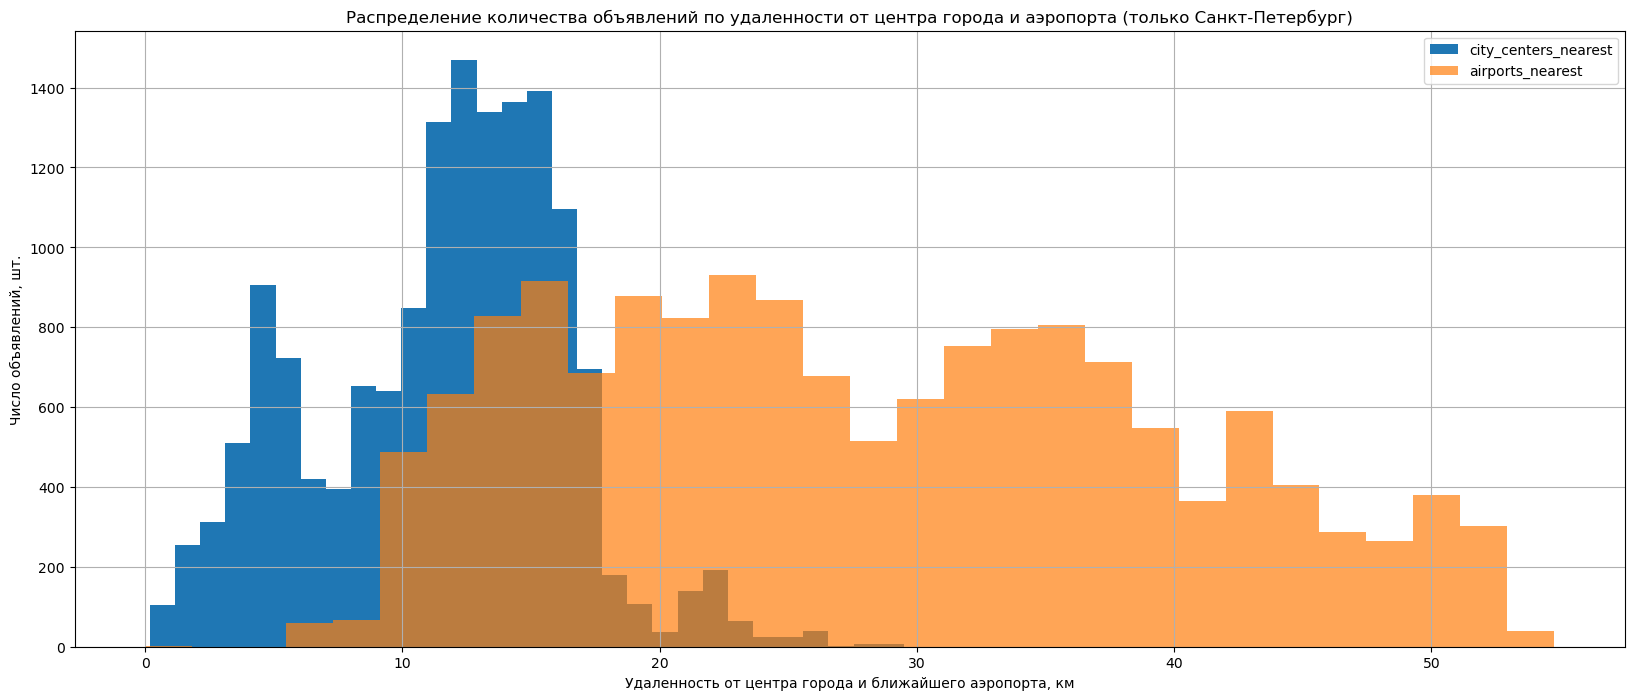

In [62]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb['city_centers_nearest'].hist(bins=30,grid=True,figsize=(20,8),legend=True)
spb['airports_nearest'].hist(bins=30,grid=True,figsize=(20,8),legend=True,alpha=0.7)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Удаленность от центра города и ближайшего аэропорта, км')
plt.title('Распределение количества объявлений по удаленности от центра города и аэропорта (только Санкт-Петербург)')
plt.show()

Есть квартиры практически в центре города, но б*о*льшая часть их - в радиусе 5-15 км от центра Петербурга. Скорее всего, это квартиры в спальных районах. В дальнейшем исследовании мы еще вернемся к этой выборке.
При этом от аэропорта они удалены минимум на 5 км, что, скорее всего означает, что авторы объявлений могли отмерять расстояние до аэропорта Пулково.

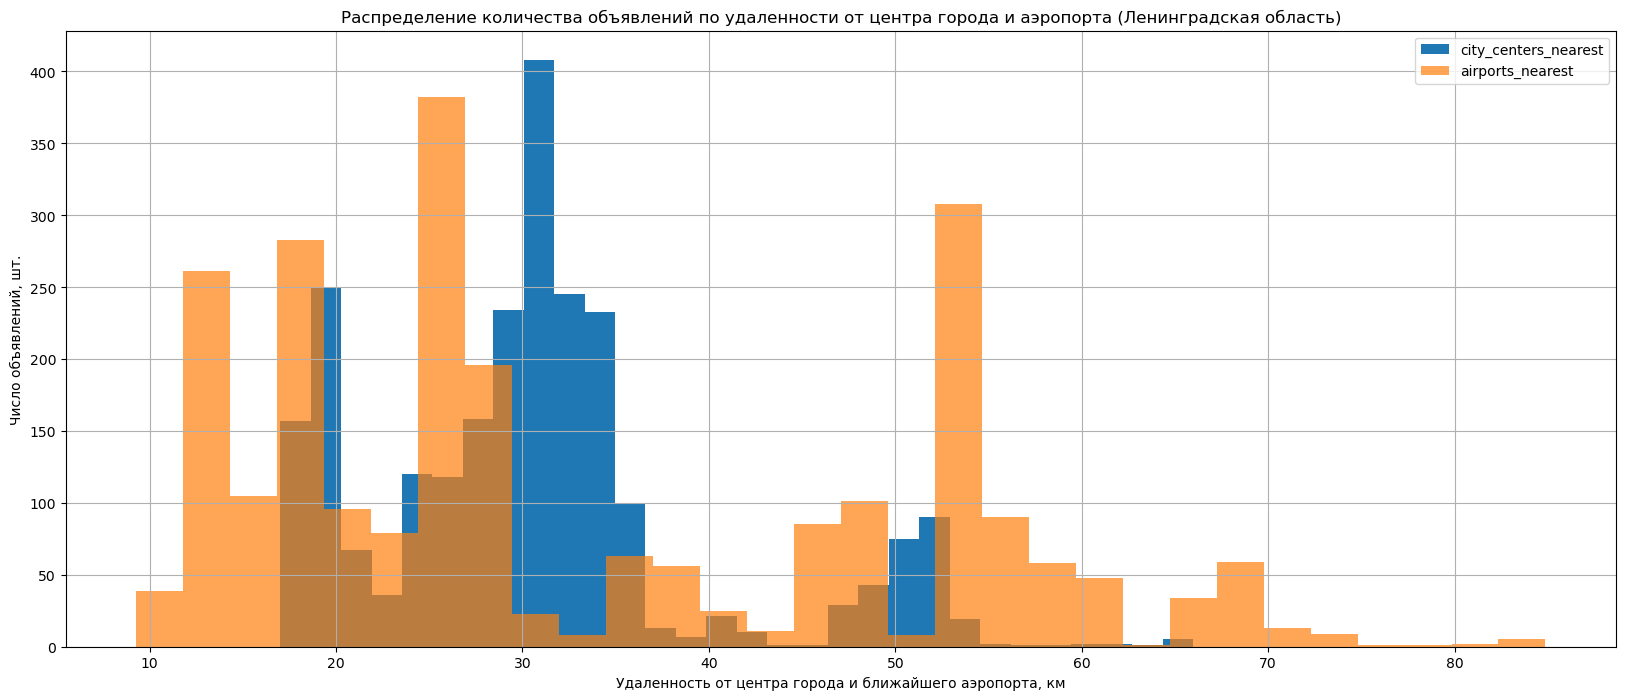

In [61]:
lenobl = data.query('locality_name != "Санкт-Петербург"')
lenobl['city_centers_nearest'].hist(bins=30,grid=True,figsize=(20,8),legend=True)
lenobl['airports_nearest'].hist(bins=30,grid=True,figsize=(20,8),legend=True,alpha=0.7)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Удаленность от центра города и ближайшего аэропорта, км')
plt.title('Распределение количества объявлений по удаленности от центра города и аэропорта (Ленинградская область)')
plt.show()

Минимальное расстояние до центра города - от 15 км, а это означает, что авторы объявлений, скорее всего, измеряли расстояние до Санкт-Петербурга.
С расстоянием до аэропорта история аналогична Санкт-Петербургу, поскольку действительно, даже от ближайших пригородов Санкт-Петербурга минимальное расстояние до Пулково - минимум 7 км по прямой.

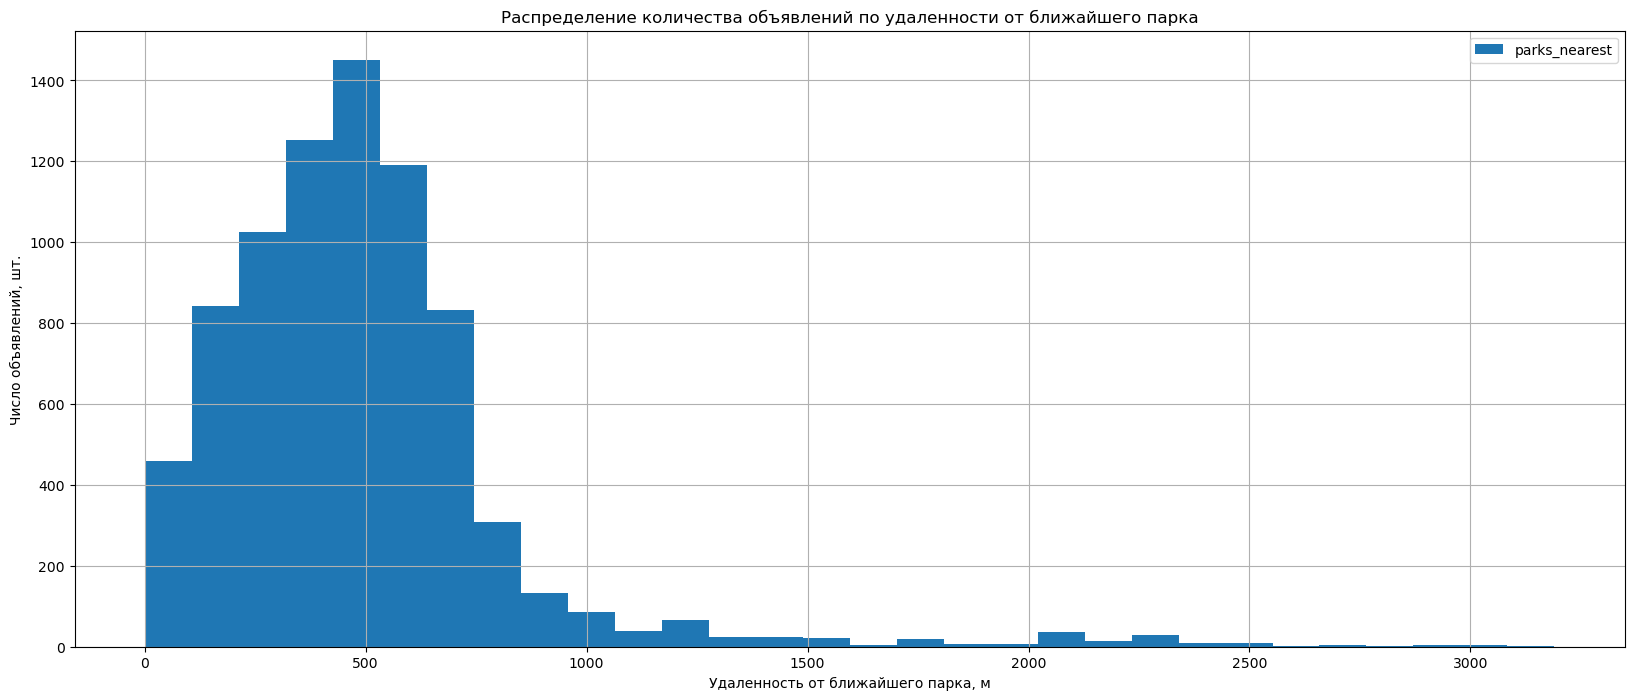

In [65]:
data['parks_nearest'].hist(bins=30,grid=True,figsize=(20,8),legend=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Удаленность от ближайшего парка, м')
plt.title('Распределение количества объявлений по удаленности от ближайшего парка')
plt.show()

Петербург - город парков, говорят в народе. И это действительно так. Очень много квартир имеют в радиусе 800 метров как минимум один парк. Соответственно, статистика подтверждает народную молву.

Теперь изучим статистику публикации объявлений по датам, дням недели и месяцам.

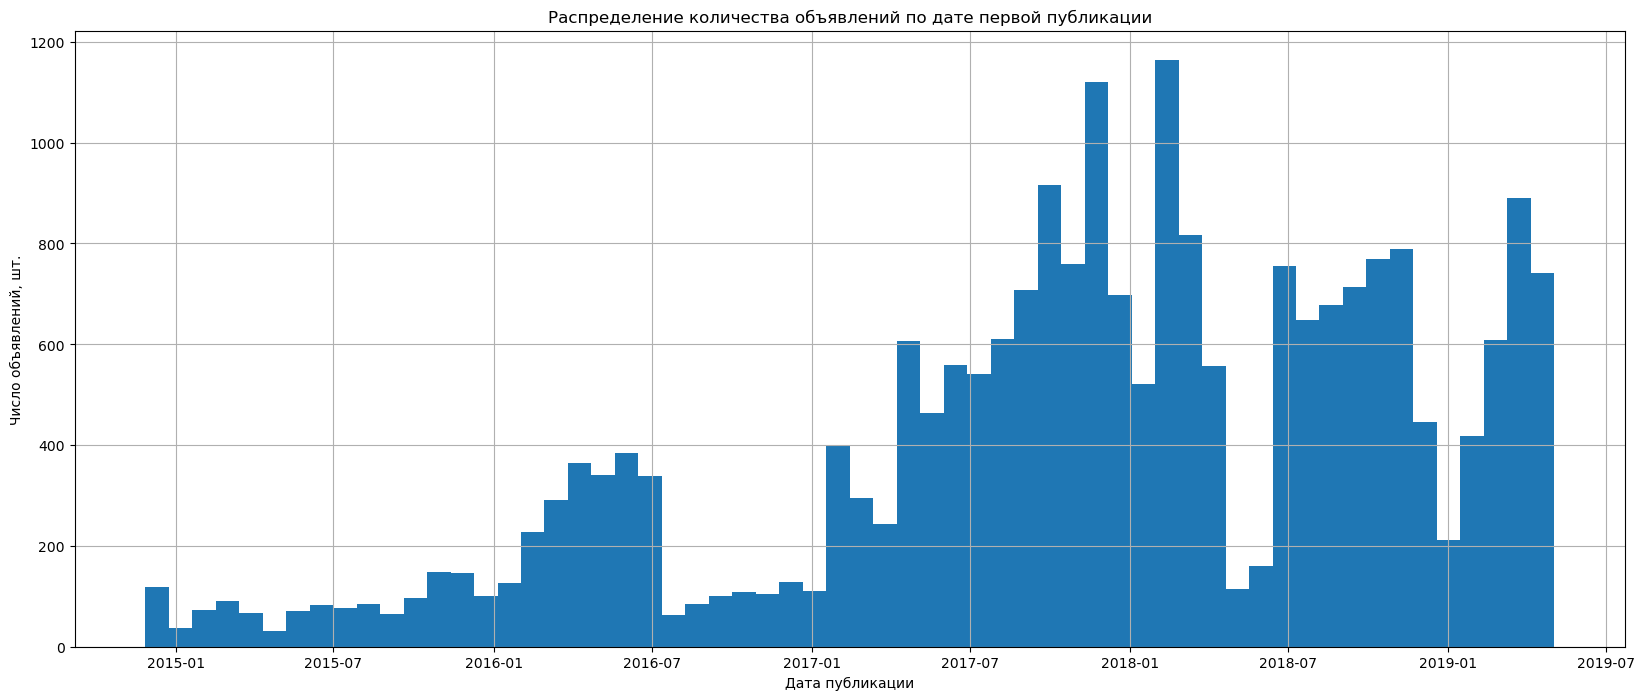

In [67]:
data['first_day_exposition'].hist(bins=60,grid=True,figsize=(20,8))
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Дата публикации')
plt.title('Распределение количества объявлений по дате первой публикации')
plt.show()

Интересно заметить, что в 2016 году в первом полугодии публиковалось больше объявлений, чем во втором.
В 2017 и 2018 годах наблюдаются "просадки" в весенний период с ростом к осени и падением к декабрю. О 2019 годе судить невозможно ввиду ограниченности данных по этому периоду.
При этом самый активный период по продаже жилья обнаруживается осенью 2017 года, когда размещалось более 1200 объявлений.
Начальные же периоды дают низкие показатели, скорее всего, ввиду начала работы сервиса и малого охвата ЦА, что связано с развитием цифровизации и тогдашней приверженности людей к стандартным методам продажи.

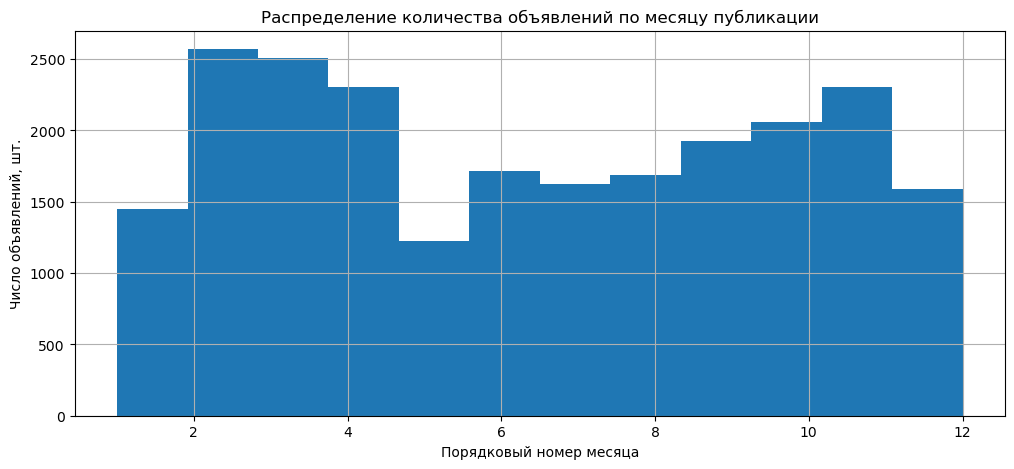

In [71]:
data['month'].hist(bins=12, figsize=(12,5),grid=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Порядковый номер месяца')
plt.title('Распределение количества объявлений по месяцу публикации')
plt.show()

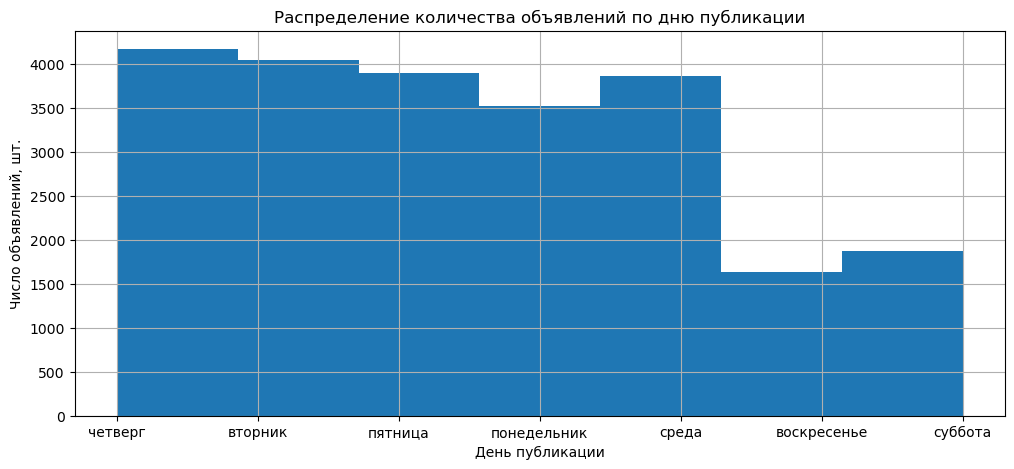

In [72]:
data['day_name'].hist(bins=7, figsize=(12,5),grid=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('День публикации')
plt.title('Распределение количества объявлений по дню публикации')
plt.show()

Гистограмма по месяцам подтверждает мысль о том, что декабрь, январь и апрель-май - определенно не самые "рыбные" месяцы на рынке недвижимости. При этом объявления практически стабильно часто размещаются в феврале-марте и далее летом с ростом до ноября.

В разрезе дней недели - самые часто встречающиеся дни -- будние. Это может быть обсуловлено как тем, что люди размещают объявления, находясь на работе, так и тем, что объявления могут размещаться риэлторами. Просадки в субботу и воскресенье особенно явно об этом говорят.

Поэтому, скорее всего, можно предположить, что самые горячие периоды на рынке недвижимости - это весна и осень.

А если объявление размещено в выходной день - скорее всего, оно размещено человеком, не желающим прибегать к услугам риэлторов.

### Изучение скорости продажи квартир

Ранее мы уже рассмотрели распределение частоты размещения объявлений по датам за весь период исследования, поэтому примем во внимание общий восходящий тренд на размещение объявлений, обусловленный расширением охвата сервиса.

Теперь же изуим распределение количества объявлений по скорости реализации объектов.

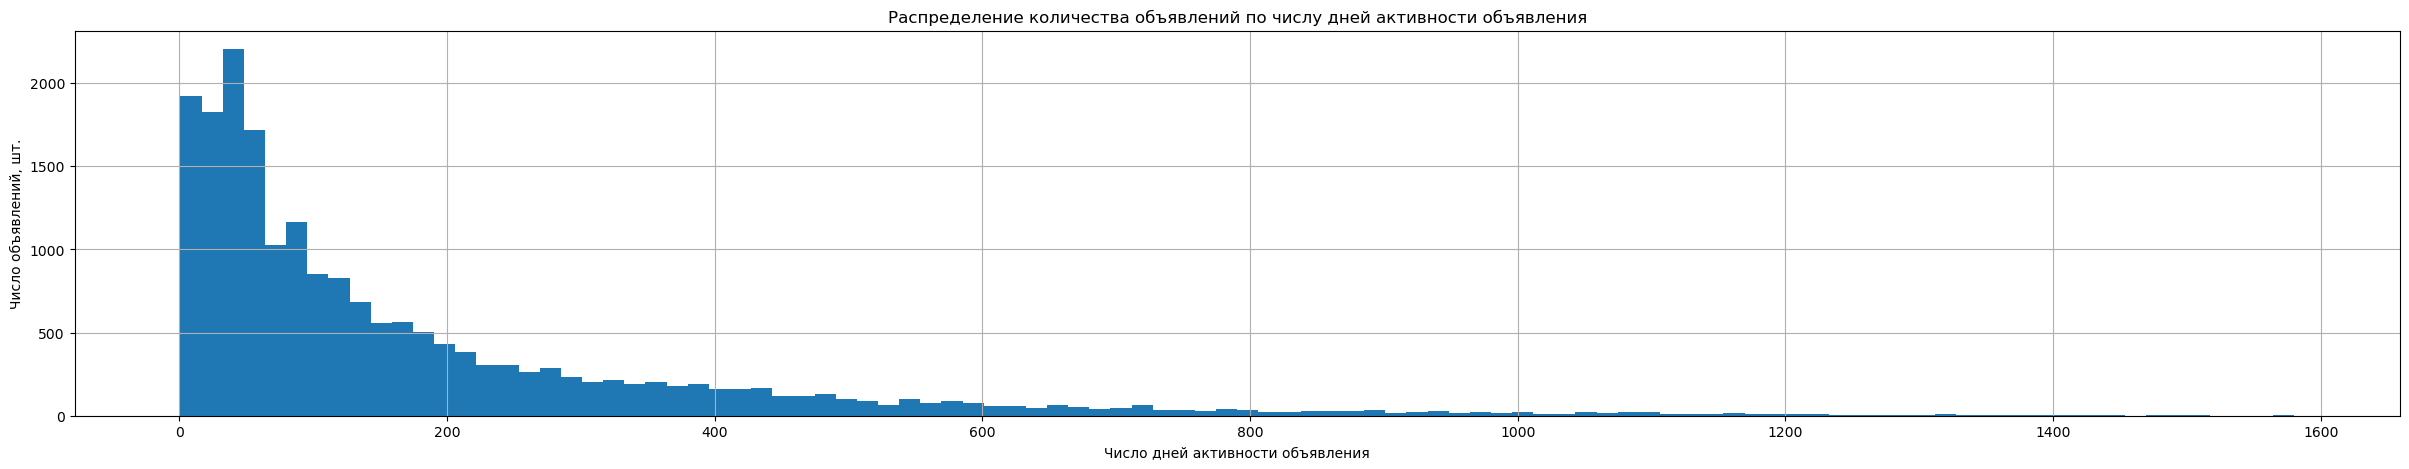

In [74]:
exposition = data.query('days_exposition > 0')
exposition['days_exposition'].hist(bins=100,figsize=(30,5),grid=True)
plt.ylabel('Число объявлений, шт.')
plt.xlabel('Число дней активности объявления')
plt.title('Распределение количества объявлений по числу дней активности объявления')
plt.show()

In [75]:
exposition['days_exposition'].min()

1.0

In [76]:
exposition['days_exposition'].max()

1580.0

In [77]:
exposition['days_exposition'].value_counts().head(30)

45.0    827
60.0    523
7.0     221
30.0    202
90.0    196
4.0     168
3.0     152
5.0     146
14.0    142
9.0     137
8.0     134
20.0    133
11.0    131
18.0    126
10.0    125
44.0    125
6.0     121
15.0    121
13.0    121
22.0    120
29.0    119
21.0    118
28.0    117
19.0    117
35.0    114
17.0    113
24.0    113
23.0    109
54.0    109
34.0    109
Name: days_exposition, dtype: int64

У нас есть короткая таблица на 30 самых часто встречающихся значений срока продажи квартир.

Согласно ей, больше всего квартир продавалось в течение 45 дней с момента публикации.
на втором месте - квартиры, которые продавались 60 дней. Достаточно велико число квартир, продававшихся в течение недели или двух.

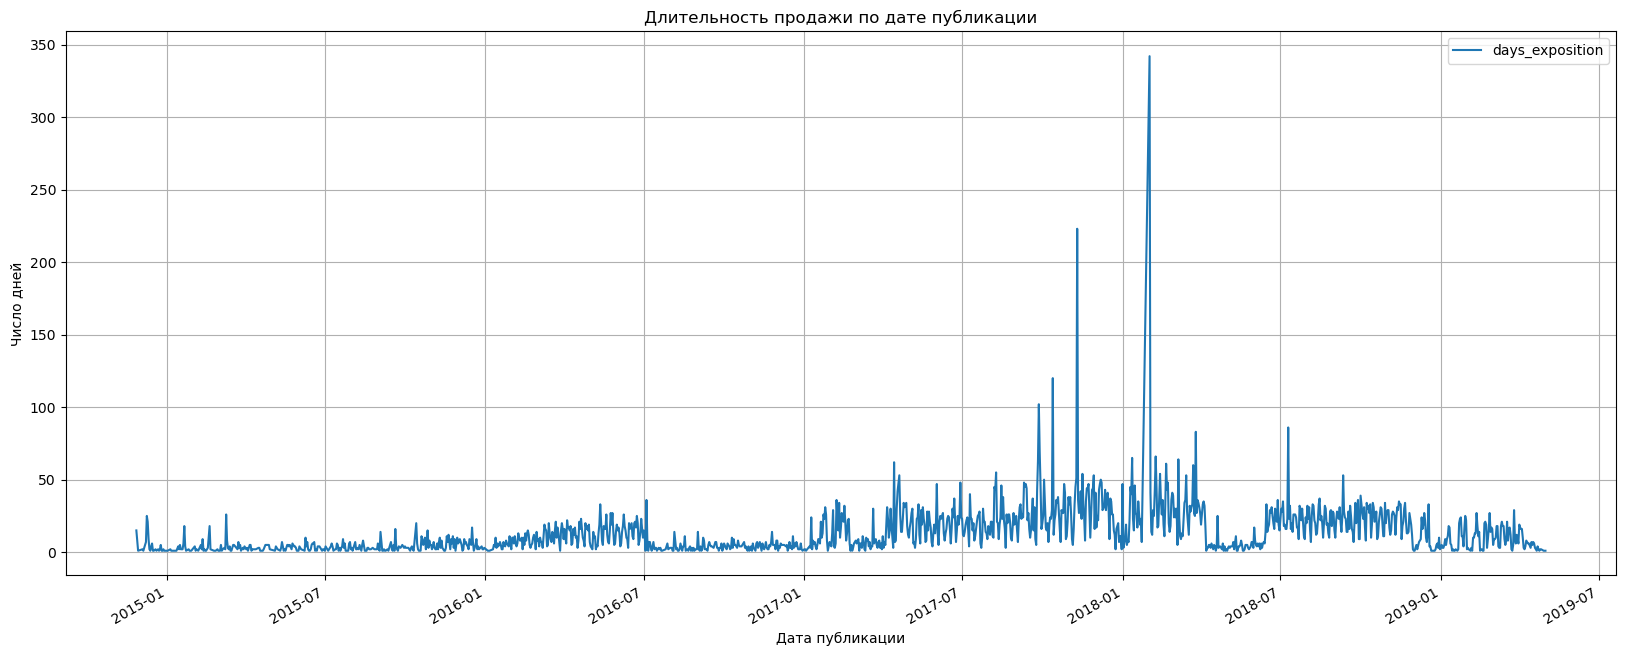

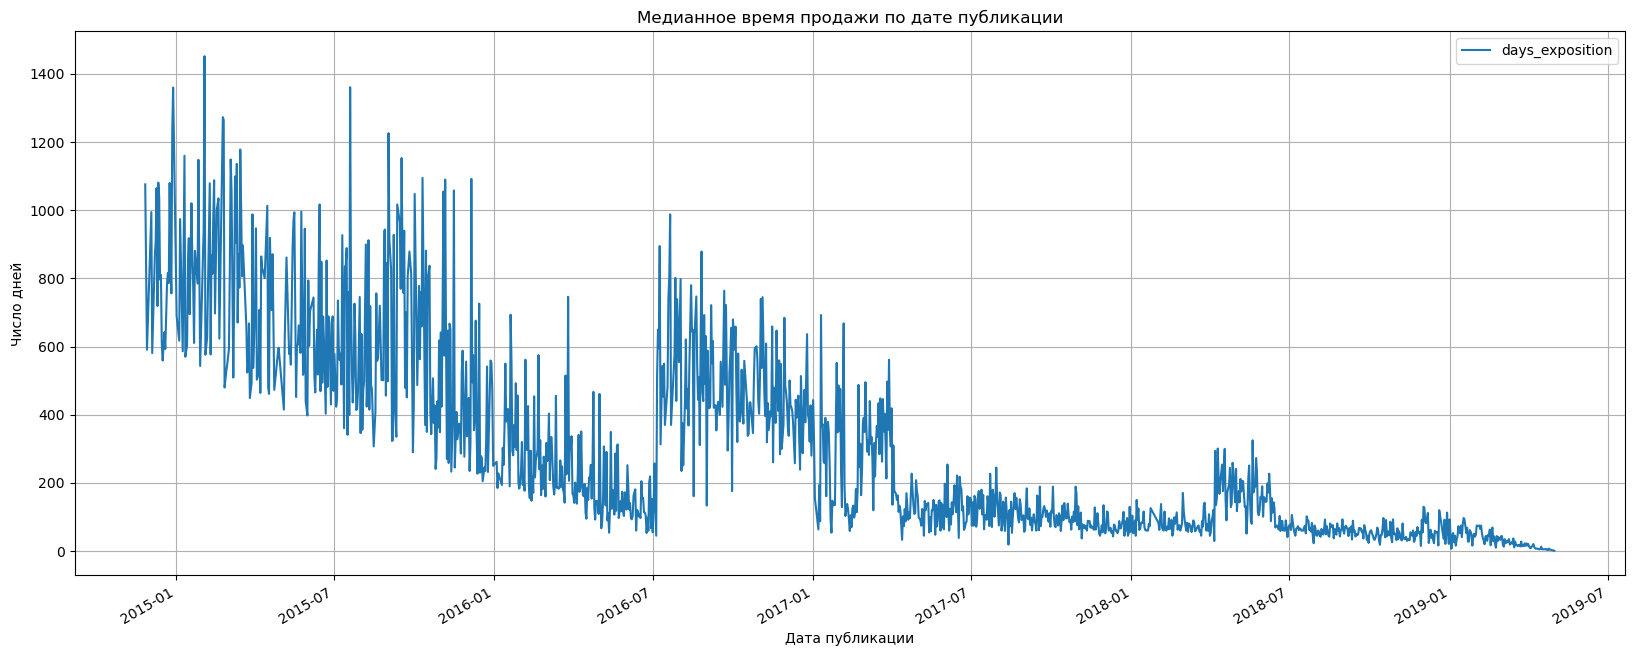

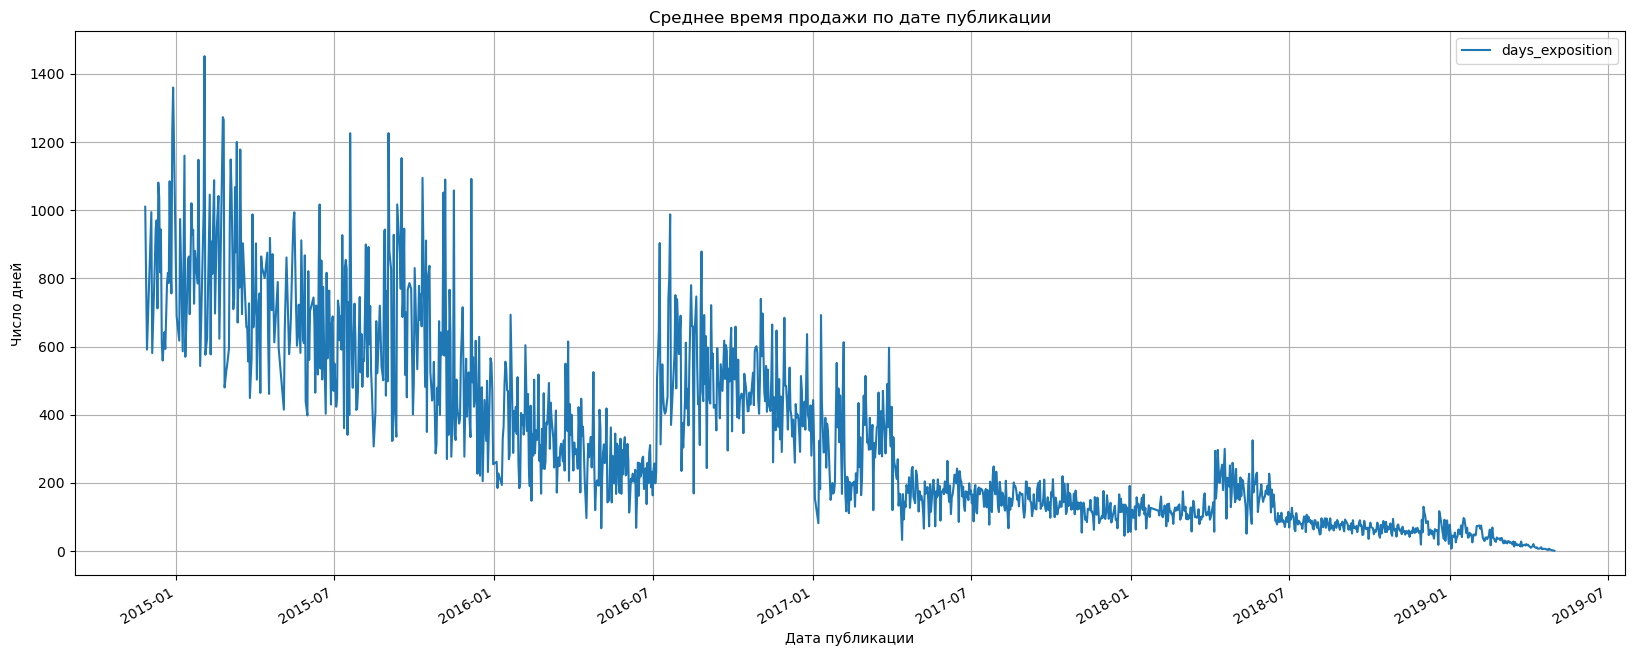

In [81]:
exposition.pivot_table(index='first_day_exposition',values='days_exposition', aggfunc='count').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Число дней')
plt.xlabel('Дата публикации')
plt.title('Длительность продажи по дате публикации')
exposition.pivot_table(index='first_day_exposition',values='days_exposition', aggfunc='median').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Число дней')
plt.xlabel('Дата публикации')
plt.title('Медианное время продажи по дате публикации')
exposition.pivot_table(index='first_day_exposition',values='days_exposition', aggfunc='mean').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Число дней')
plt.xlabel('Дата публикации')
plt.title('Среднее время продажи по дате публикации')
plt.show()

По графику видно, что большинство объявлений по датам публикации находились в активном состоянии в районе 50 дней. Достаточно много объявлений уходили практически сразу. Также наблюдаются значительные выбросы у единичных объявлений в размере более 200 и 300 дней. Поэтому внимательнее изучим поведение объявлений для срока меньше 50 дней и для срока более 100 дней.

Вполне разумно предположить, что продажи можно типировать по времени, назвав быстрыми продажи сроком около месяца, а длинными - продажи более 3 месяцев.

По графикам медианного и среднего времени размещения объявления явно видна тенденция к уменьшению среднего и медианного времени продажи квартиры с течением времени. Скорее всего это может быть обусловлено как развитием сервиса, так и увеличением спроса и предложения, и притоком новых пользователей (как продавцов, так и покупателей).

In [80]:
expo_less_50 = data.query('days_exposition < 50')
expo_more_100 = data.query('days_exposition > 100')

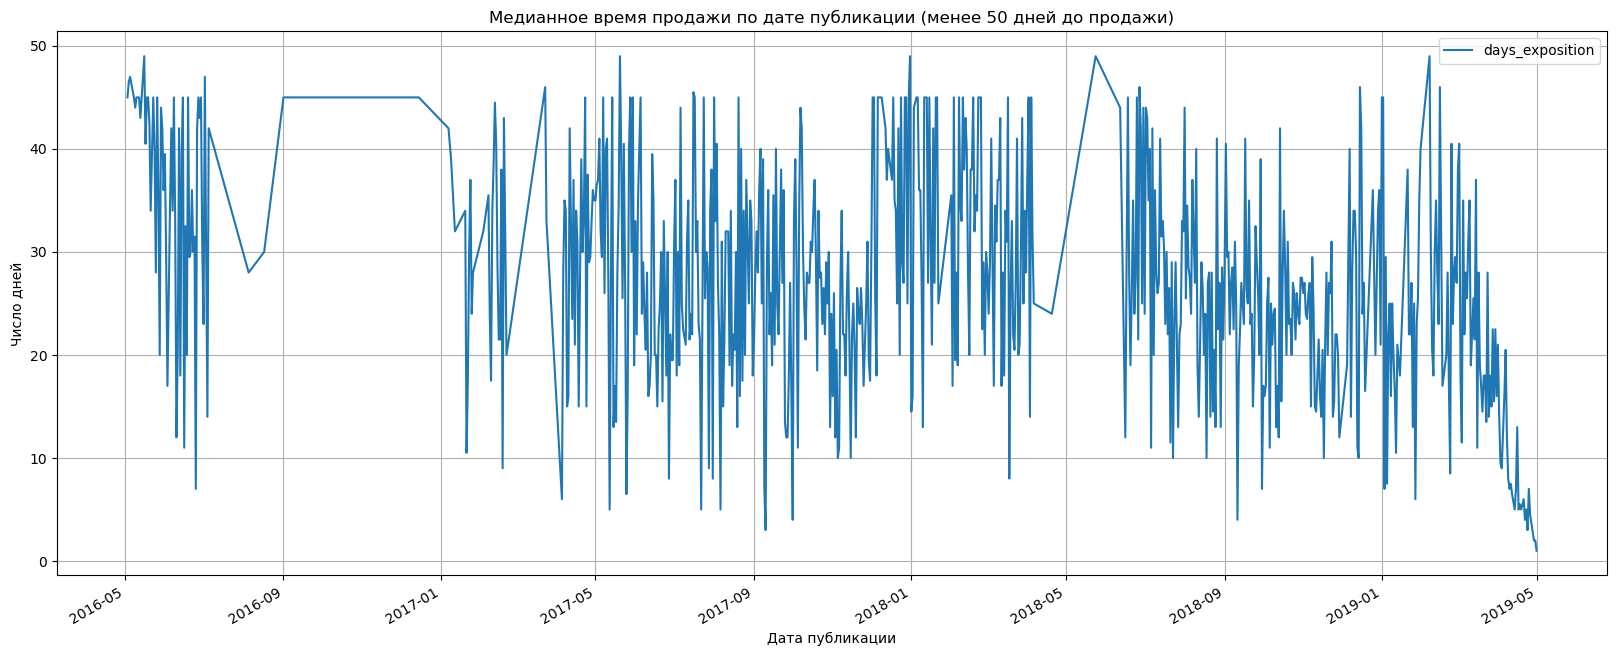

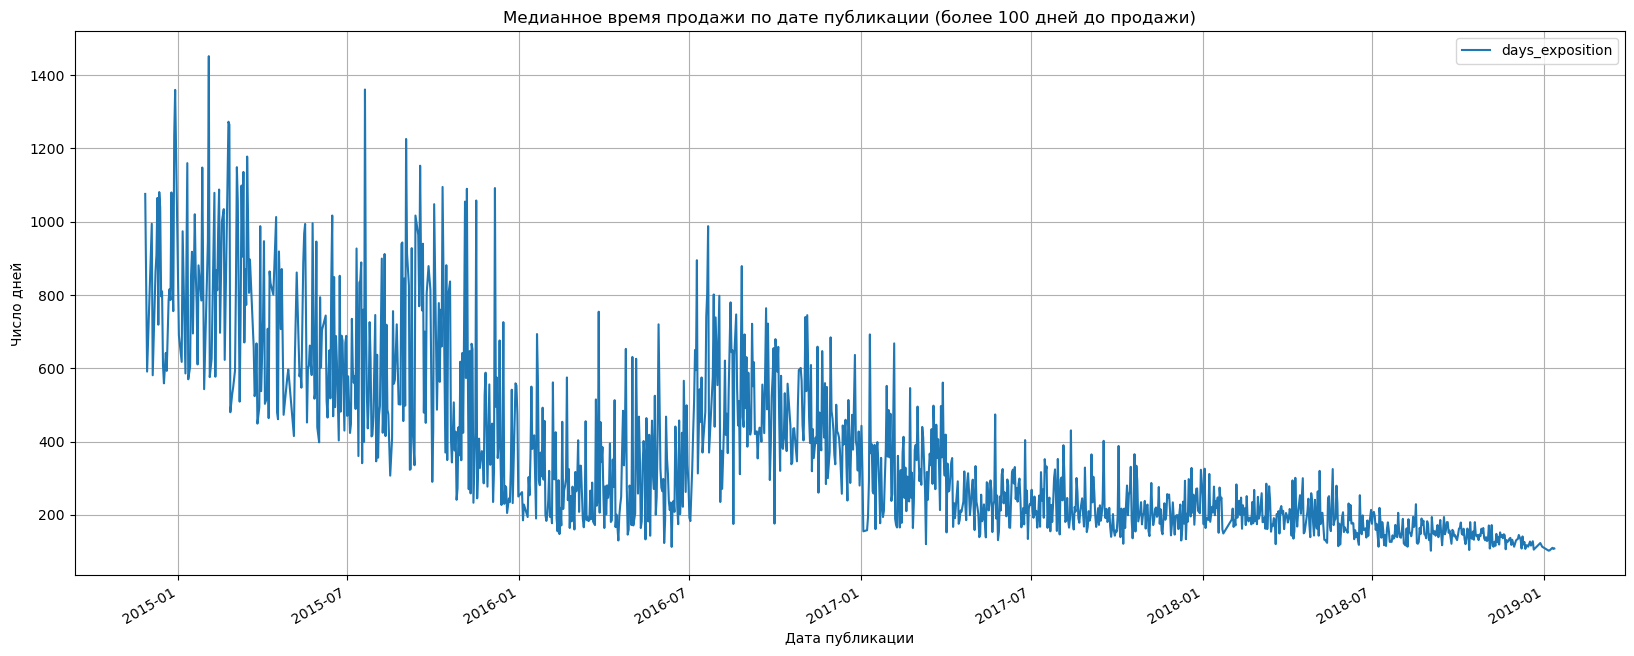

In [82]:
expo_less_50.pivot_table(index='first_day_exposition',values='days_exposition', aggfunc='median').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Число дней')
plt.xlabel('Дата публикации')
plt.title('Медианное время продажи по дате публикации (менее 50 дней до продажи)')
expo_more_100.pivot_table(index='first_day_exposition',values='days_exposition', aggfunc='median').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Число дней')
plt.xlabel('Дата публикации')
plt.title('Медианное время продажи по дате публикации (более 100 дней до продажи)')
plt.show()

По первому графику видно, что во второй половине 2016 года объявлений с коротким сроком продажи было достаточно мало, то же самое наблюдалось и летом 2018 года. Особенно много быстрых сделок было осенью 2017 года, в начале 2018 года и несколько меньше осенью 2018 года.

По второму графику можно заметить, что долгие сделки были для объявлений, размещенных в феврале 2018 года, а также наблюдаются малые выбросы осенью 2017 года и весной 2018 года.

В итоге, можно заметить, что для быстрых сделок характерен общий тренд на продажу квартиры примерно в одному промежутке между 10 и 50 днями. Поэтому, подобные сделки можно классифицировать как быстрые. К маю 2019 года тренд снижается, что может быть вполне обусловлено ростом числа объявлений в сервисе.

В то же время, долгих сделок со временем стало становиться меньше, и общий тренд стремится к 100 дням на продажу. Это также может быть обсуловлено тем, что предложение на рынке растет, а вместе с ним также растет спрос, без которого не было бы тренда на понижение.

Принимая во внимание то, что имеется общий тренд на увеличение количества размещаемых объявлений, можно с уверенностью сказать, что типология в целом верна и увеличение предложения при прочих равных условиях увеличивает спрос, а вместе с ним и скорость оборачиваемости объявления.

Теперь изучим среднее и медианное количество дней на сделку для квартир в общем, а также в разрезе по количеству комнат.

In [83]:
data['days_exposition'].mean()

182.2280074525404

In [84]:
data['days_exposition'].median()

97.0

Итого среднее время продажи квартиры в разрезе всех имеющихся данных - 182 дня, медианное - 97 дней.

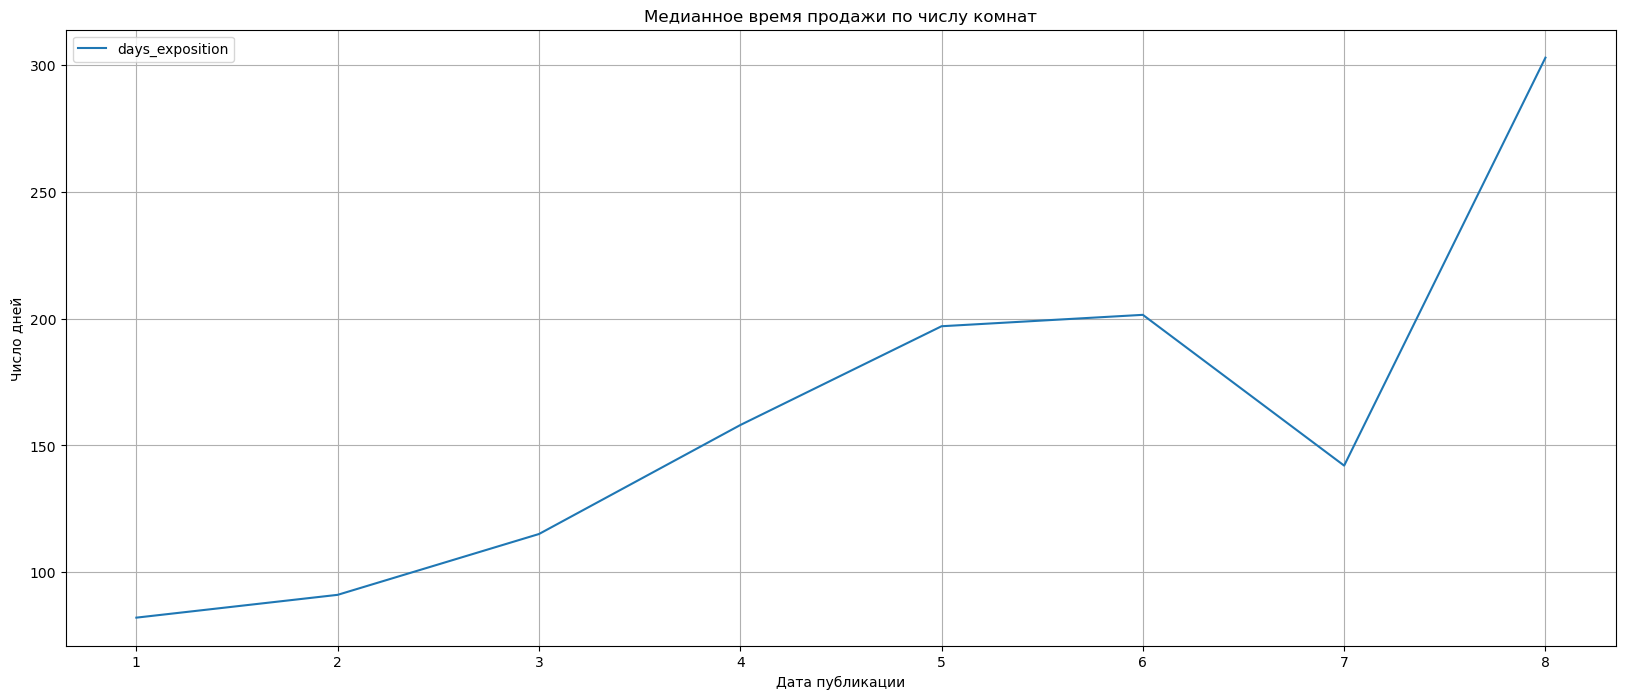

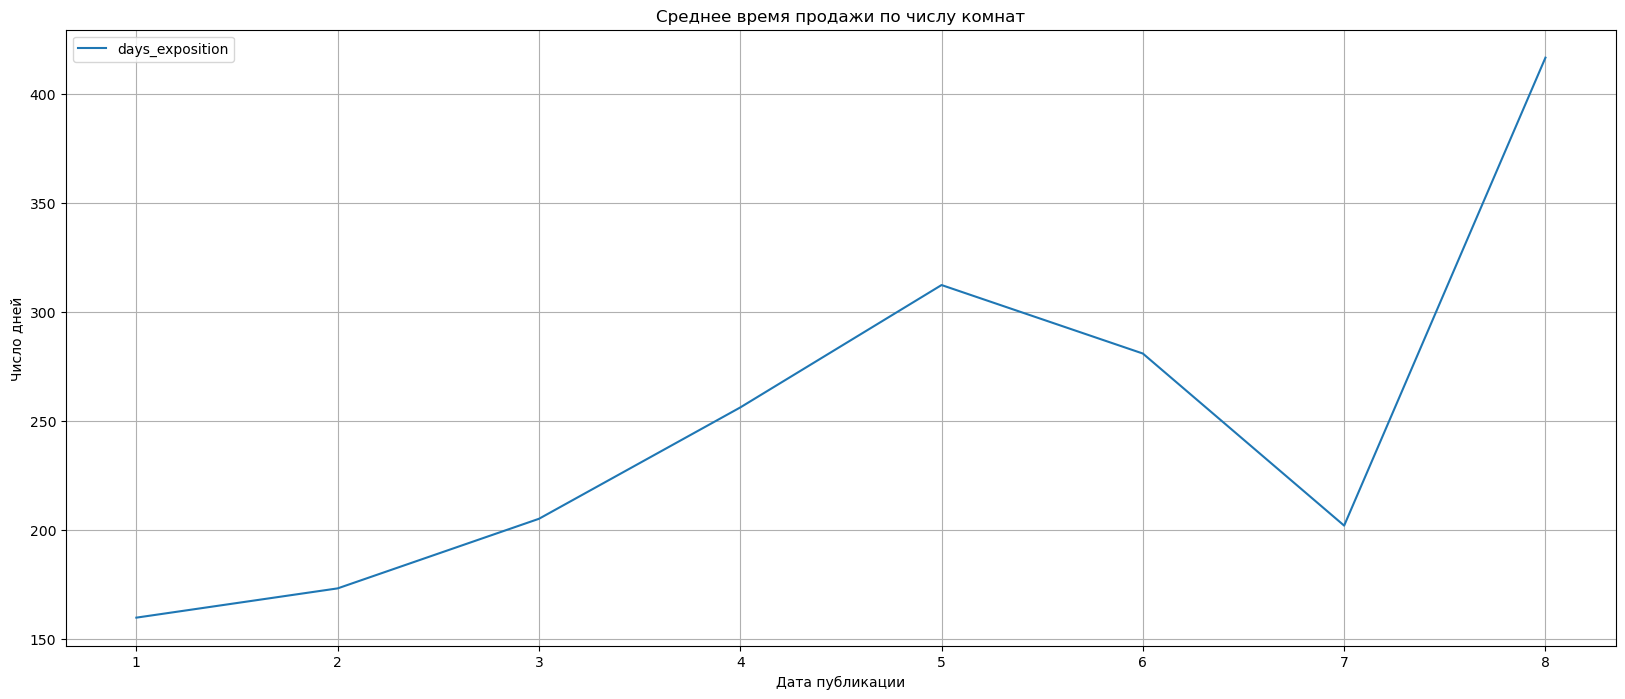

In [86]:
exposition.pivot_table(index='rooms',values='days_exposition', aggfunc='median').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Число дней')
plt.xlabel('Дата публикации')
plt.title('Медианное время продажи по числу комнат')
exposition.pivot_table(index='rooms',values='days_exposition', aggfunc='mean').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Число дней')
plt.xlabel('Дата публикации')
plt.title('Среднее время продажи по числу комнат')
plt.show()

Вполне логично, что с увеличением количества комнат увеличивается время продажи квартиры. При этом интересно резкое снижение времени для 6/7-комнатных квартир. Скорее всего, в таблице (как и в реальной жизни) может быть довольно мало квартир с таким большим количеством комнат, а спрос на них может быть весьма высоким. Проверим гипотезу.

In [87]:
data['rooms'].value_counts()

2    7834
1    7781
3    5718
4    1153
5     317
6     102
7      58
8      11
Name: rooms, dtype: int64

Действительно, таких квартир не так уж и много. Однако, на скорость их продажи могут влиять и другие факторы, не только ценовые, но и неценовые.

### Исследование факторов, влияющих на стоимость квартиры

Исходя из житейского опыта, можно предположить, что на стоимость объекта напрямую может влиять его площадь (общая, жилая, кухни), количество комнат, этаж (в разрезе типологии "первый, последний, другой"), удаленность от центра города, а также время размещения объявления.

Начнем с площади и изучим зависимость изменения цены в зависимости от общей площади, жилой площади и площади кухни.

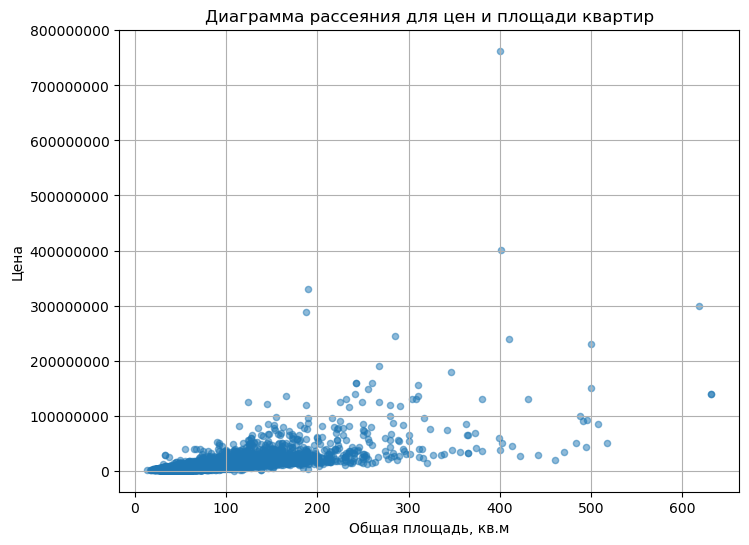

In [91]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Цена')
plt.xlabel('Общая площадь, кв.м')
plt.title('Диаграмма рассеяния для цен и площади квартир')
plt.ticklabel_format(style='plain')
plt.show()

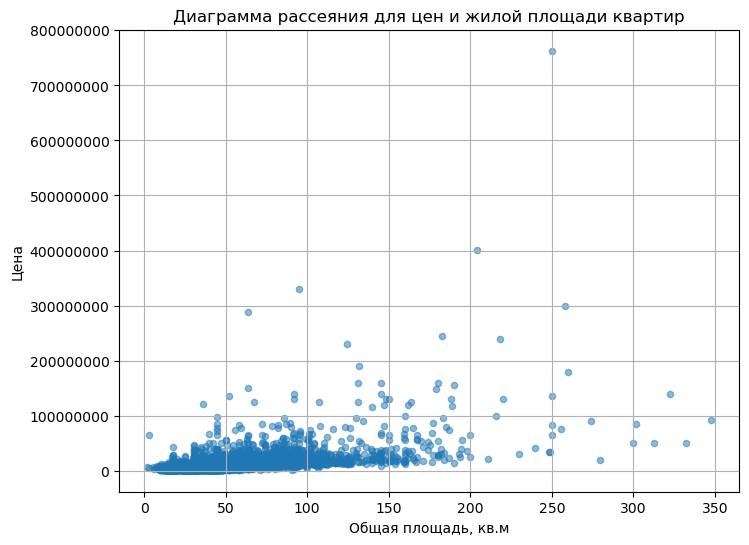

In [92]:
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Цена')
plt.xlabel('Общая площадь, кв.м')
plt.title('Диаграмма рассеяния для цен и жилой площади квартир')
plt.ticklabel_format(style='plain')
plt.show()

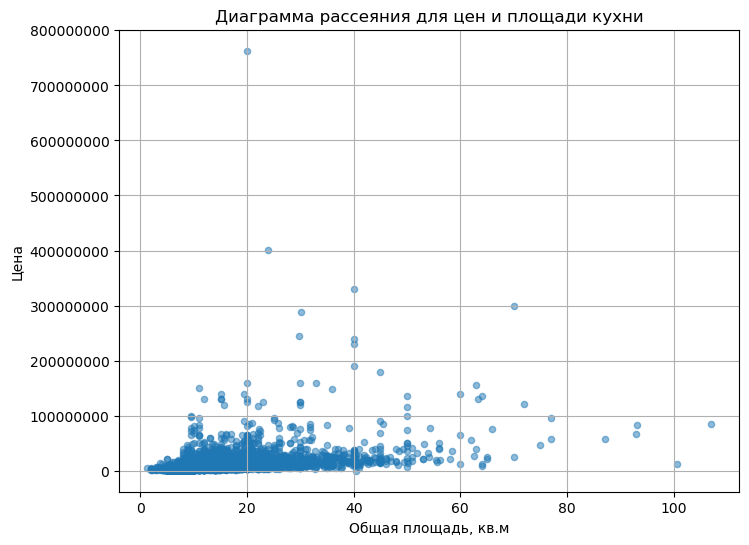

In [93]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Цена')
plt.xlabel('Общая площадь, кв.м')
plt.title('Диаграмма рассеяния для цен и площади кухни')
plt.ticklabel_format(style='plain')
plt.show()

Все три графика показывают вполне явную концентрацию с похожим паттернов у большинства значений цены и площади. Для того, чтобы подтвердить это, рассчитаем коэффициенты корреляции для цены и площади.

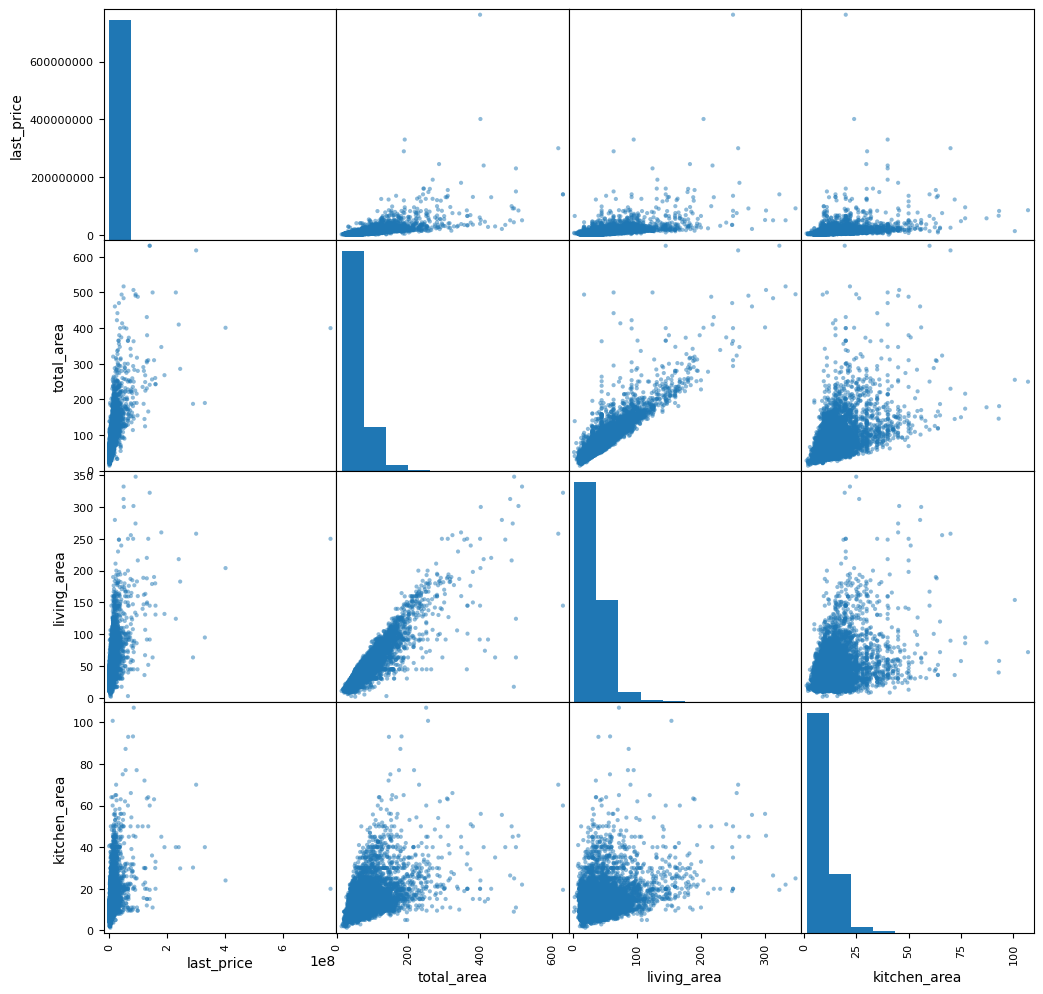

In [95]:
area_df = data[['last_price', 'total_area', 'living_area', 'kitchen_area']]
pd.plotting.scatter_matrix(area_df, figsize=(12, 12)) 
plt.show()

In [97]:
area_df.corr().style.background_gradient(axis=None) 

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.642918,0.547675,0.440551
total_area,0.642918,1.000000,0.910115,0.578982
living_area,0.547675,0.910115,1.000000,0.405277
kitchen_area,0.440551,0.578982,0.405277,1.000000


Из таблицы видно, что между ценой на квартиру и разного рода площадью есть взаимосвязь. Причем среди всего трех показателей она сильнее у общей площади квартиры, на втором месте - жилая площадь и на третьем - площадь кухни. Вполне логично, что чем больше площадь квартиры и жизненное пространство в ней - тем она дороже.

Далее исследуем взаимозависимость цены и количества комнат.

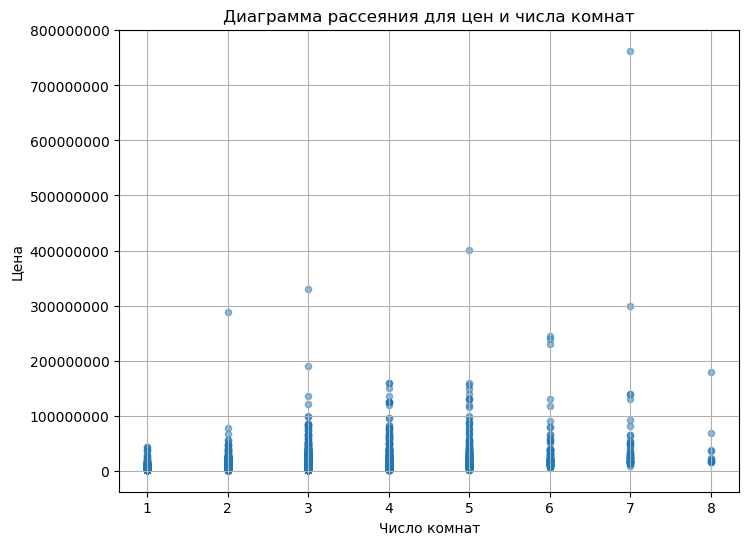

In [99]:
rooms_df = data[['last_price', 'rooms']]
rooms_df.plot(x='rooms', y='last_price', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Цена')
plt.xlabel('Число комнат')
plt.title('Диаграмма рассеяния для цен и числа комнат')
plt.ticklabel_format(style='plain')
plt.show()

In [100]:
rooms_df.corr().style.background_gradient(axis=None) 

,last_price,rooms
last_price,1.000000,0.356584
rooms,0.356584,1.000000


Очень интересный график и таблица корреляции. Определенно, зависимость между количеством комнат и ценой на квартиру есть, и чем их больше, тем выше цена. Однако, число комнат не так сильно влияет на цену в сравнении с площадью квартиры. Ведь может быть и двухкомнатная квартира площадью 70 метров, и семикомнатная квартира площадью 70 метров (опустим кухню). И двухкомнатная квартира будет и предпочтительнее и дороже, чем семикомнатная при прочих равных условиях.

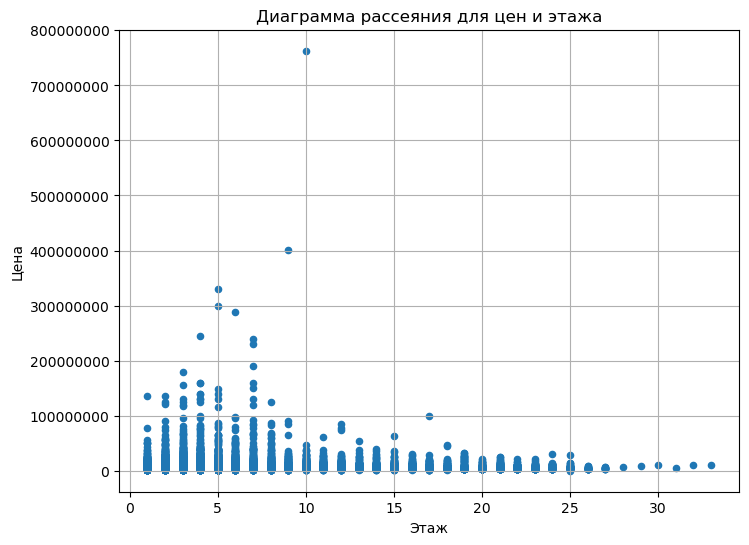

In [101]:
floor_df = data[['last_price', 'floor']]
floor_df.plot(x='floor', y='last_price', kind='scatter', figsize=(8,6), grid=True, sharex=False)
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.title('Диаграмма рассеяния для цен и этажа')
plt.ticklabel_format(style='plain')
plt.show()

In [102]:
floor_df.corr().style.background_gradient(axis=None) 

,last_price,floor
last_price,1.000000,0.025041
floor,0.025041,1.000000


Определенно, стоимость зависит от этажа, на котором располагается квартира, но влияние данной характеристики значительно меньше, чем остальных основных параметров квартиры. И если рассматривать рынок недвижимости в элитных высотках с апартаментами, то в них этаж, на котором находятся апартаменты, будет значительно влиять на цену объекта, поскольку будет добавлять к его характеристикам "захватывающие виды на **<подставьте название района города>**". В рассмотрении массового рынка жилья скорее будет влиять наличие парков в доступности, а также расстояние до станции метро, либо иных остановок общественного транспорта.

Теперь в рамках задания рассмотрим влияние на цену года размещения (скорее всего будет прямая зависимость ввиду инфляции и постоянного роста цен на жилье), месяца размещения (выше рассматривалась сезонность размещения объявлений - чем выше сезон тем ниже цена, скорее всего) и дня недели размещения (предположительно, влияние будет минимальным)

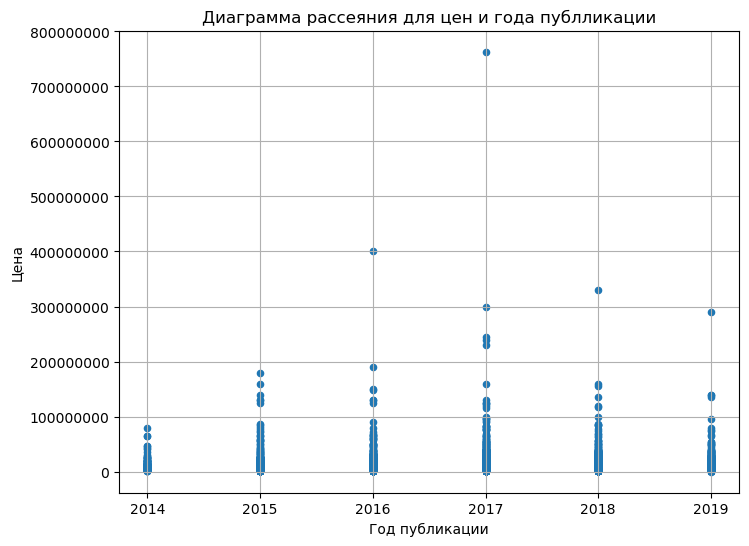

In [104]:
year_df = data[['last_price', 'year']]
year_df.plot(x='year', y='last_price', kind='scatter', figsize=(8,6), grid=True, sharex=False)
plt.ylabel('Цена')
plt.xlabel('Год публикации')
plt.title('Диаграмма рассеяния для цен и года публликации')
plt.ticklabel_format(style='plain')
plt.show()

In [109]:
year_df.corr().style.background_gradient(axis=None) 

,last_price,year
last_price,1.000000,-0.044435
year,-0.044435,1.000000


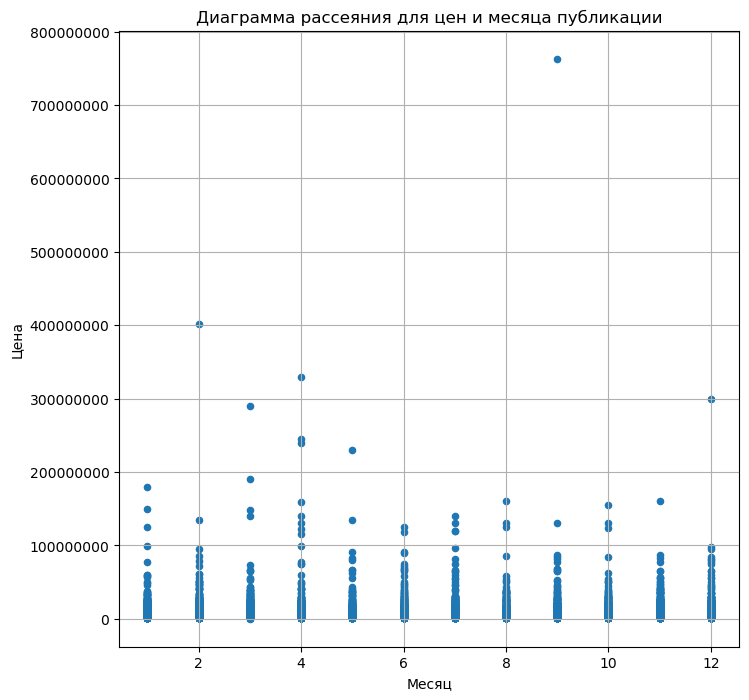

In [106]:
month_df = data[['last_price', 'month']]
month_df.plot(x='month', y='last_price', kind='scatter', figsize=(8,8), grid=True, sharex=False)
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.title('Диаграмма рассеяния для цен и месяца публикации')
plt.ticklabel_format(style='plain')
plt.show()

In [110]:
month_df.corr().style.background_gradient(axis=None) 

,last_price,month
last_price,1.000000,0.000854
month,0.000854,1.000000


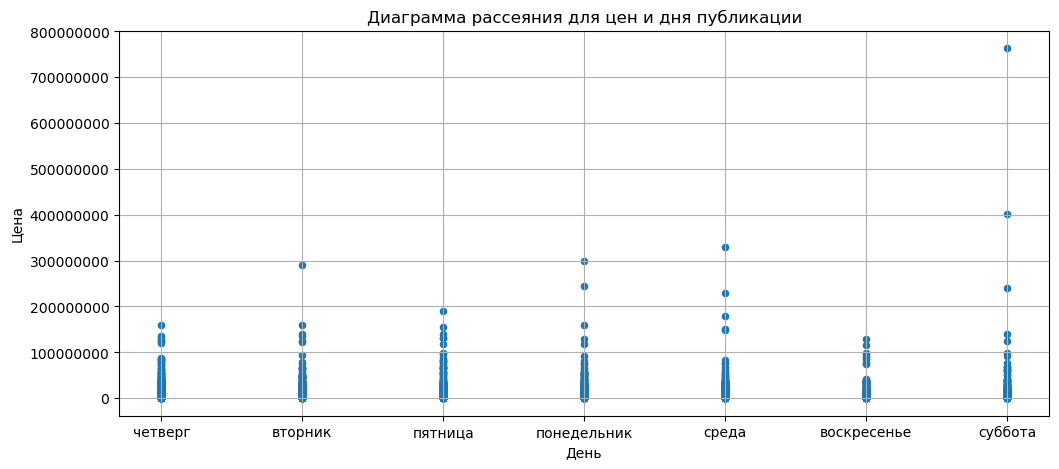

In [115]:
day_df = data[['last_price', 'day_name']]
data.plot(x='day_name', y='last_price', kind='scatter', figsize=(12,5),grid=True)
plt.ylabel('Цена')
plt.xlabel('День')
plt.title('Диаграмма рассеяния для цен и дня публикации')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Ни одна из гипотез не подтвердилась.

**В разрезе года**, если понаблюдать за динамикой публикации объявлений, их число росло от года к году, тем самым сработал эффект масштаба и с увеличением числа предложений сформировалась более справедливая цена на рынке в сторону ее незначительного снижения.

**Влияние месяца публикации** на цену практически нулевое, что, скорее всего обусловлено уже упоминавшимся эффектом масштаба, когда в определенные сезоны увеличивалось количество поданных объявлений, что в целом вело к установлению равновесной и справедливой цены на рынке.

**Влияние дня размещения** также совершенно неочевидно, поскольку вне зависимости от дня, общая ситуация на крупном рынке, коим является рынок недвижимости, подвержена влиянию иных факторов, которые рассматривались выше.

Исследуем зависимость цены от типологии этажа в разрезе "первый, последний, другой".
Для этого построим график распределения цен по типам этажей и рассмотрим в том числе среднюю и медианную цену на метр в зависимости от типа этажа.

In [116]:
floor_pivot=data.pivot_table(index='floor_category', values='meter_price', aggfunc=['count','mean','median'])
floor_pivot.columns=['total','meter_mean','meter_median']
floor_pivot.sort_values('total', ascending=False).round(2).reset_index()

,floor_category,total,meter_mean,meter_median
0,другой,16891,103412.29,98115.75
1,последний,3255,92847.51,87649.40
2,первый,2828,81694.60,81201.92


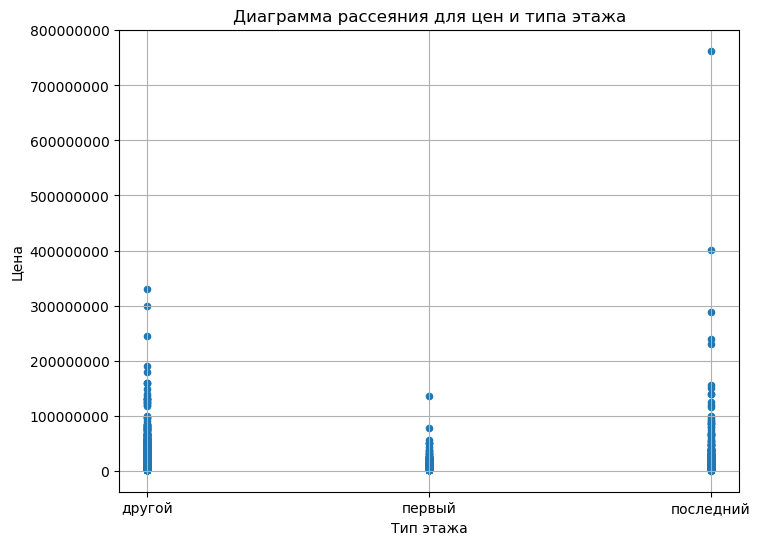

In [118]:
floor_type_df = data[['last_price', 'floor_category']]
floor_type_df.plot(x='floor_category', y='last_price', kind='scatter', figsize=(8,6), grid=True, sharex=False)
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.title('Диаграмма рассеяния для цен и типа этажа')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Из сводной таблицы и графика видно, что первых и последних этажей намного меньше, чем этажей, находящихся между ними. Однако, из таблицы видно, что и средняя и медианная цена квадратного метра на первом этаже самая маленькая среди трех видов. Это означает, что среди продавцов и покупателей до сих пор есть обоснованный стереотип о том, что квартира на первом этаже больше подвержена разного рода техногенным проблемам от соседей выше, а также может быть лакомой целью для квартирных воров (многие помнят, как в 90е на первых этажах домов практически везде были решетки на окнах).

График распределения цены же показывает, что даже максимальное значение цены квартиры на первом этаже меньше 15 миллионов, в то время как и последний и "другой" этажи чаще могут стоить даже больше.

В то же время, и последний этаж не является самым дорогим ни по общей цене, ни по средней, ни по медианной.

Это также восходит к началу свободного рынка недвижимости, когда квартиры на последних этажах были менее популярны, чем на всех других (кроме первого). Причина этому - отсутствие ремонта крыши, некачественные материалы покрытия крыши, некачественное проведение строительных работ и прочее. Как результат - сырые стены, плесень, отваливающиеся обои, сквозняки, грохот незакрепленного металла крыши и множество других факторов, негативно влияющих на восприятие ценности подобной квартиры.

**Вывод**

На цену квартиры определяющее значение оказывает ее площадь, жилая площадь, площадь кухни и количество комнат. Фактически, данные характеристики являются основополагающими при установлении цены. Увеличение числа объявлений с течением времени является скорее фактором, влияющим на установление равновесной цены на рынке, которая действительно будет отражать реальную стоимость того или иного объекта при опущении иных косвенных или качественных факторов, которые невозможно оценить числовыми показателями.

В рамках проведенного исследования также можно вполне уверенно установить, что цена квартиры может зависеть и от этажа, на котором расположена квартира. Было установлено, что средняя и медианная цены квадратного метра на первом и последнем этажах ниже всех других этажей. При этом, цена квартиры на первом этаже будет ниже всех остальных этажей. Поэтому вполне справедливо считать, что тип этажа ("первый, последний, другой") может влиять на цену квартиры, давая определенные рынком ограничения на нее. Однако, несмотря на это, определяющими будут факторы площади и количества комнат в квартире.

Таким образом, с течением времени при имеющемся увеличении числа предложений на рынке, цена на каждую квартиру вне зависимости от качественных факторов, будет стремиться к равновесной и более справедливой.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

Для исследования этого вопроса построим сводную таблицу по городам со средней ценой метра и изучим её.

In [119]:
meter_pivot=data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count','mean','median'])
meter_pivot.columns=['total','meter_mean','meter_median']
meter_pivot.sort_values('total', ascending=False).round(2).head(10).reset_index()

,locality_name,total,meter_mean,meter_median
0,Санкт-Петербург,15317,114624.22,104545.45
1,Мурино,528,85008.84,84192.74
2,Шушары,430,78017.23,76573.50
3,Кудрово,424,94766.41,94656.65
4,Всеволожск,381,68748.24,65789.47
5,Пушкин,368,103180.40,100000.00
6,Колпино,335,75396.77,74725.27
7,Парголово,320,90262.96,91780.22
8,Гатчина,302,68699.55,67671.51
9,Выборг,229,58123.07,58307.69


Вполне логично, что в Санкт-Петербурге будет больше всего объявлений ввиду размера города, и средняя и медианная цена будет максимальной среди топ-10 городов по количеству объявлений.

Теперь изучим средние и медианные величины для самых "дорогих" и самых "дешевых" населенных пунктов:

In [120]:
meter_pivot.sort_values('meter_mean', ascending=False).round(2).head(10).reset_index()

,locality_name,total,meter_mean,meter_median
0,Зеленогорск,24,115122.80,101666.67
1,Санкт-Петербург,15317,114624.22,104545.45
2,Репино,4,104238.61,86542.21
3,Пушкин,368,103180.40,100000.00
4,Сестрорецк,182,101694.01,99526.73
5,Лисий Нос,3,100660.81,74525.75
6,Мистолово,11,98549.98,90888.89
7,Левашово,1,96997.69,96997.69
8,Кудрово,424,94766.41,94656.65
9,Парголово,320,90262.96,91780.22


In [121]:
meter_pivot.sort_values('meter_mean', ascending=False).round(2).tail(10).reset_index()

,locality_name,total,meter_mean,meter_median
0,Лужайка,1,15000.00,15000.00
1,Житково,2,14956.28,14956.28
2,Ям-Тесово,2,13711.55,13711.55
3,Сижно,1,13709.68,13709.68
4,Выскатка,1,13207.55,13207.55
5,Тёсово-4,1,12931.03,12931.03
6,Малая Романовка,1,12724.55,12724.55
7,Совхозный,2,12629.13,12629.13
8,Свирь,2,11481.48,11481.48
9,Старополье,3,11206.22,11000.00


Неудивительно, самые высокие средние цены на метр в Санкт-Петербурге и его окрестностях. Репино - это вообще Курортный район, то самое Комарово, куда можно уехать на недельку до второго. Иными словами, в топ-10 по средней цене - Санкт-Петербург и его окрестности. Впрочем, ничего удивительного.

В аутсайдерах, что логично, максимально удаленные от Питера сельские поселения и поселки. Старополье - это вообще практически граница с Эстонией. Судя по карте, поселок находится вдалеке от крупных дорог, что и влияет на цену жилья в нем.

**Вывод**

Самые дорогие квартиры находятся в Петербурге и его ближайших пригородах. Причем, чем "элитнее" пригород - тем дороже в нем квадратный метр жилья. Вдобавок к этому хорошая транспортная доступность, небольшая удаленность от областного центра и красивые пейзажи, и территории, в которых сама история а расстоянии вытянутой руки.

Напротив, самые дешевые квартиры в отдаленных поселках, которые могут быть либо дачными, либо полувымершими. Удобства, скорее всего есть, но транспортная доступность и обеспеченность различными благами большого города и цивилизации может оставлять желать лучшего. Поэтому и цена невелика. Однако и здесь можно найти определенный шарм, если есть желание у покупателя пожить в уединенном уголке поближе к природе.

### Изучение средней цены дополнительного километра удаления от центра города в Санкт-Петербурге

Воспользуемся уже ранее использовавшейся промежуточной переменной spb и изучиим показатели по ней.
В частности, рассмотрим изменение средней стоимости квадратного метра по мере удаления от центра города и отразим это на графике.

In [122]:
def km_convert(km):
    for i in range (1, (int(spb['city_centers_nearest'].max())+1)):
        if km <= i:
            return i
spb['km_center'] = spb['city_centers_nearest'].apply(km_convert)
spb.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17040\3278220794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['km_center'] = spb['city_centers_nearest'].apply(km_convert)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,floor_category,meter_price,year,month,day_name,km_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,другой,120370.370370,2019,3,четверг,17.0
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,90.0,2,574.0,558.0,другой,92785.714286,2015,8,четверг,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.0,9,False,...,84.0,3,234.0,424.0,другой,408176.100629,2015,7,пятница,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,другой,100000.000000,2018,6,вторник,9.0
7,5,7915000.0,71.6,2019-04-18,2,2.70,24,30.5,22,False,...,NaN,0,NaN,NaN,другой,110544.692737,2019,4,четверг,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0,NaN,289.0,другой,88524.590164,2017,2,воскресенье,16.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2,553.0,137.0,другой,127525.252525,2017,11,четверг,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.70,14,20.5,5,False,...,590.0,1,296.0,19.0,другой,119230.769231,2017,11,суббота,15.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,420.0,0,NaN,397.0,первый,81707.317073,2017,11,четверг,11.0
17,6,4180000.0,36.0,2016-09-09,1,2.70,17,16.5,7,False,...,NaN,1,859.0,571.0,другой,116111.111111,2016,9,пятница,15.0


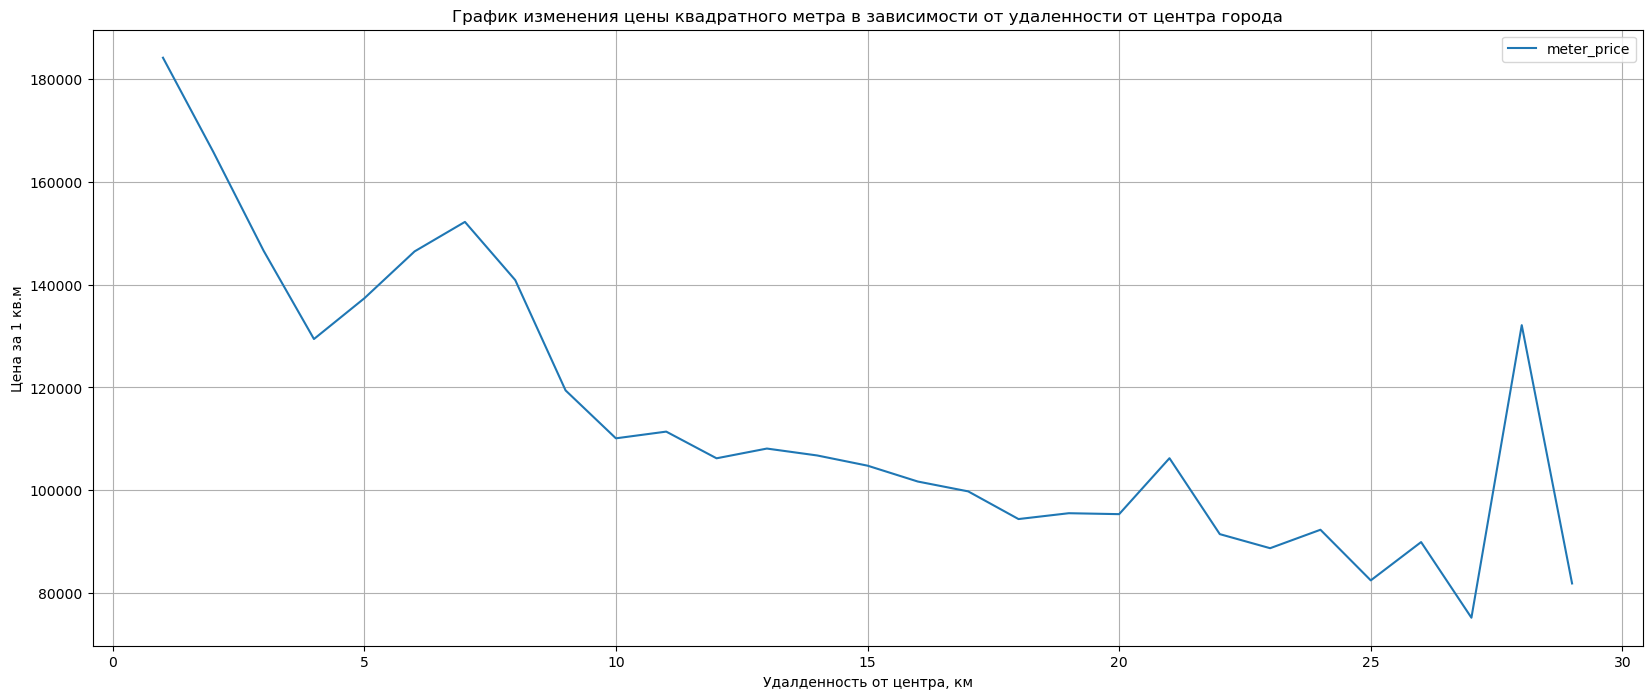

In [125]:
spb.pivot_table(index='km_center', values='meter_price', aggfunc='mean').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Цена за 1 кв.м')
plt.xlabel('Удалденность от центра, км')
plt.title('График изменения цены квадратного метра в зависимости от удаленности от центра города')
plt.show()

In [126]:
km_pivot=spb.pivot_table(index='km_center', values='meter_price', aggfunc=['count','mean','median'])
km_pivot.columns=['total','meter_mean','meter_median']
km_pivot.sort_values('km_center',ascending=True).round(2).head(10).reset_index()

,km_center,total,meter_mean,meter_median
0,1.0,84,184165.18,135480.79
1,2.0,239,165836.20,123966.94
2,3.0,297,146590.24,113848.20
3,4.0,512,129413.92,110013.93
4,5.0,884,137333.62,125915.50
5,6.0,751,146471.03,125368.73
6,7.0,463,152211.42,133858.27
7,8.0,400,140884.74,125000.00
8,9.0,659,119413.33,113333.33
9,10.0,663,110088.49,105263.16


In [127]:
km_pivot.sort_values('km_center',ascending=True).round(2).tail(10).reset_index()

,km_center,total,meter_mean,meter_median
0,20.0,76,95330.35,93166.21
1,21.0,79,106218.48,106744.19
2,22.0,193,91439.98,88288.29
3,23.0,136,88703.11,84995.05
4,24.0,29,92293.83,89965.40
5,25.0,22,82440.34,86133.03
6,26.0,61,89894.44,88888.89
7,27.0,3,75171.91,56521.74
8,28.0,2,132115.71,132115.71
9,29.0,10,81840.64,79631.20


График и часть сводной таблицы демонстируют интересные результаты.
Следуя законам логики, чем ближе к центру - тем дороже должна быть квартира. Однако, встречаются нетипичные пики, незначительно влияющие на общий тренд к снижению цены с ростом удаления от центра. При этом интересно, что есть и отрицательные пики для четырёхкилометровой удаленности от центра. Возможно в этой зоне могут быть квартиры из ветхого фонда, продаваемые за бесценок. Напротив, отдельные пики в значительном удалении от центра могут быть объяснены тем, что квартиры могут продаваться в новостройках, либо в неких элитных ЖК со всеми удобствами в красивых районах города с захватывающими видами, что является косвенными факторами, влияющими на цену квадратного метра в таких районах. Скорее всего, для более точного анализа необходимо рассматривать также и тип дома, год постройки, его состояние и так далее, особенно в случае с таким большим городом, полным исторических зданий, как Санкт-Петербург.

## Общий вывод

По итогам исследования было установлено, что с течением времени количество объявлений на нем только увеличивалось. Это оказалось значительное влияние на максимальное время продажи квартиры, постепенно приближая его к 100 дням. Показатель подтверждается общими медианным и средним значениями времени продажи квартиры.

Было установлено, что достаточно много продается однокомнатных и двухкомнатных квартир, со стандартной высотой потолка в 2,5 - 2,7 метра. Есть отдельные выбросы в виде квартир дворцового типа, возможно кто-то мог ради шутки выставить на продажу Зимний дворец или любой другой объект, когда-то принадлежавший царскому двору. 

Также было установлено, что больше всего домов, в которых продаются квартиры, имеют 5 и 9-10 этажей, что вполне соответствует распространенности стандартной высоты потолков в них. Дополнительно к этому, большинство квартир продается на 1-10 этажах, что также подтверждает это утверждение.

Напрямую подтверждено народное наблюдение, что в Санкт-Петербурге очень много парков и большинство из них действительно в шаговой доступности.

Установлено, что максимальное количество квартир продается в спальных районах, а жители Санкт-Петербурга и области отмеряют расстояние от центра города, даже если они живут в других близлежащих городах. Это один из косвенных факторов, определяющих Санкт-Петербург и Ленобласть как агломерацию, то есть, наличие стремления жителей региона к одному крупному центру.

В части формирования цены установлено, что наибольшее влияние на нее оказывает площадь квартиры, площадь кухни и жилая площадь. Количество комнат и этаж, на котором расположена квартира, также имеет значение, но на конечную цену оказывает меньшее влияние, чем основные параметры квартиры. *При этом, квартиры на первых и последних этажах будут дешевле квартир на остальных этажах, что обусловлено более высокими рисками для собственности и психологическими и поведенченскими факторами.*

При этом, в разрезе временного промежутка размещения объявления, установлено, что влияние отрицательное, и, как было исследовано выше, с увеличением количества объявлений с течением времени, цена имеет тенденцию несколько снижаться, тем самым подтверждая экономическую теорию об установлении равновесной цены с ростом предложения.

Подтверждено, что самые дорогие квартиры оказались в Санкт-Петербурге и его исторических пригородах, изобилующих различными достопримечательностями. При этом также подтверждено, что наиболее удаленные от областного центра города имеют более низкую цену за 1 кв. метр. Однако и здесь есть исключения, которые могут быть обусловлены иными неценовыми факторами, к примеру, наличием предложения в элитных кварталах/посёлках, находящихся ближе к границам города "в экологически чистых районах".

Итого, можно с уверенностью заявить, что определяющими факторами для цены квартиры является ее расположение относительно центра города, ее площадь, количество комнат, жилая площадь и площадь кухни. Также, на цену могут влиять неучтенные факторы, такие как год постройки дома, проект, тип дома, а также другие факторы, которые невозможно отразить на языке цифр (качество и новизна ремонта, "элитность" расположения, транспортная доступность в разрезе общественного транспорта и метро, и прочее). Скорее всего, могут также оказывать влияние и маркетинговые факторы, которые также не учтены в наборе исходных данных, равно как и восприятие потенциальными покупателями и продавцами "благополучности" районов.

Также установлено, что большинство объявлений размещалось в будние дни на протяжении всего периода исследования, что может говорить о том, что их размещают сотрудники риэлторских компаний.

Возможно, при насыщении данных дополнительными факторами, можно более точно описать рынок недвижимости и его поведение. К примеру, можно оценить взаимосвязь стоимости квартиры и года постройки дома, его типа, расположения в определенном районе города, связь транспортной доступности и стоимости недвижимости и множество других факторов, которые по итогу дадут наглядное представление о рынке.